# Example of gaze mapping of two fixations

In [68]:
import re
import numpy as np
import matplotlib.pyplot as plt

def get_gaze_pos_left(lines):
    # Extract lines between SFIX L and EFIX L events
    between_lines = lines[1:-2]

    # Filter out other events such as blinks, saccades
    between_lines = filter(lambda l: re.match(r'\d+\s*((-)?\d*\.\d*\s*){6}', l), between_lines)

    # Extract columns
    between_lines = list(map(lambda l: l.split(), between_lines))

    # Extract gaze left position
    gaze_left_pos = list(map(lambda l: (float(l[1]), float(l[2])), between_lines))
    return np.array(gaze_left_pos)


def get_fixation_left(lines):
    # EFIX L event
    efix_L = lines[-1].split()
    # This is the true fixation position (left eye)
    return float(efix_L[5]), float(efix_L[6])



## cy1.csv

Gaze samples associated to fixation from `cy1.csv` are scattered in two separate clusters.

In [69]:
# From cy1.csv
lines = """SFIX L   21684601
21684601	  460.5	  291.3	 4441.0	  315.0	  685.9	 3649.0	.....
21684601	  435.8	  441.6	 4173.0	  321.0	  720.1	 3636.0	.....
21684602	  451.1	   95.8	 4658.0	  308.6	  674.7	 3611.0	.....
21684602	  470.6	  478.2	 4314.0	  315.2	  681.9	 3669.0	.....
21684603	  463.9	  456.7	 4210.0	  325.0	  714.3	 3637.0	.....
21684603	  456.4	  469.4	 4206.0	  310.9	  695.3	 3627.0	.....
21684604	  458.1	  464.8	 4189.0	  326.1	  708.1	 3637.0	.....
21684604	  461.8	  460.1	 4233.0	  331.3	  733.9	 3689.0	.....
21684605	  470.1	  465.2	 4182.0	  334.2	  742.6	 3632.0	.....
21684605	  445.1	  396.0	 4253.0	  322.0	  703.9	 3679.0	.....
21684606	  455.9	  455.5	 4226.0	  315.3	  688.4	 3644.0	.....
21684606	  456.7	  445.2	 4307.0	  316.0	  691.4	 3643.0	.....
21684607	  466.4	  438.7	 4282.0	  313.3	  716.0	 3644.0	.....
21684607	  454.0	  456.7	 4208.0	  332.1	  720.5	 3675.0	.....
21684608	  475.9	  110.6	 4694.0	  327.7	  688.7	 3656.0	.....
21684608	  453.8	  443.9	 4251.0	  300.2	  682.2	 3641.0	.....
21684609	  452.5	  424.7	 4256.0	  308.3	  699.1	 3672.0	.....
21684609	  455.9	  449.4	 4292.0	  309.3	  677.9	 3636.0	.....
21684610	  450.1	  444.9	 4192.0	  311.2	  720.8	 3601.0	.....
21684610	  471.0	  466.4	 4279.0	  324.6	  689.3	 3665.0	.....
MSG	21684611 _MousePosition_ 484 585
21684611	  461.3	  477.9	 4189.0	  314.9	  713.3	 3644.0	.....
21684611	  448.6	  285.8	 4531.0	  327.1	  703.8	 3665.0	.....
21684612	  449.9	  401.7	 4296.0	  328.5	  721.3	 3648.0	.....
21684612	  472.2	  468.9	 4244.0	  316.8	  696.6	 3630.0	.....
21684613	  456.3	  447.2	 4184.0	  326.7	  679.6	 3627.0	.....
21684613	  462.0	  443.2	 4237.0	  347.2	  745.4	 3693.0	.....
21684614	  474.7	  476.5	 4198.0	  308.9	  692.4	 3644.0	.....
21684614	  467.8	  468.6	 4215.0	  324.5	  701.2	 3614.0	.....
21684615	  477.9	  478.9	 4218.0	  315.7	  687.3	 3632.0	.....
21684615	  466.2	  397.3	 4255.0	  315.1	  728.3	 3654.0	.....
21684616	  472.4	  472.9	 4259.0	  329.4	  712.7	 3640.0	.....
21684616	  466.4	  450.4	 4209.0	  313.2	  686.8	 3615.0	.....
21684617	  455.3	  459.7	 4146.0	  321.3	  726.9	 3648.0	.....
21684617	  473.9	  461.6	 4228.0	  319.1	  715.1	 3643.0	.....
21684618	  482.9	  476.8	 4222.0	  324.5	  681.4	 3637.0	.....
21684618	  466.3	  432.1	 4241.0	  324.2	  714.0	 3682.0	.....
21684619	  448.8	  445.1	 4218.0	  335.5	  731.5	 3686.0	.....
21684619	  478.6	  452.6	 4279.0	  320.9	  689.2	 3620.0	.....
21684620	  468.5	  477.2	 4275.0	  319.0	  710.1	 3659.0	.....
21684620	  455.2	  434.8	 4177.0	  330.5	  703.3	 3645.0	.....
21684621	  463.7	  443.0	 4201.0	  311.2	  676.5	 3615.0	.....
21684621	  473.0	  408.9	 4292.0	  319.4	  690.0	 3636.0	.....
21684622	  469.8	  441.2	 4207.0	  334.4	  766.2	 3702.0	.....
21684622	  471.6	  459.2	 4259.0	  337.8	  705.2	 3662.0	.....
21684623	  486.9	  432.4	 4231.0	  324.4	  687.4	 3620.0	.....
21684623	  462.2	  451.9	 4212.0	  315.6	  669.3	 3636.0	.....
21684624	  460.3	  142.8	 4652.0	  339.9	  725.7	 3670.0	.....
21684624	  470.9	  456.9	 4217.0	  334.1	  703.6	 3624.0	.....
21684625	  480.6	  403.3	 4238.0	  340.8	  718.9	 3650.0	.....
21684625	  452.5	  440.0	 4227.0	  328.2	  728.0	 3651.0	.....
21684626	  464.1	  465.0	 4159.0	  346.2	  719.0	 3674.0	.....
21684626	  475.3	  226.7	 4525.0	  312.3	  699.9	 3670.0	.....
21684627	  459.9	  427.6	 4226.0	  345.1	  705.4	 3672.0	.....
21684627	  465.9	  461.1	 4208.0	  314.7	  692.6	 3617.0	.....
MSG	21684628 _MousePosition_ 481 585
21684628	  464.7	  451.3	 4246.0	  337.0	  714.7	 3658.0	.....
21684628	  476.1	  464.7	 4188.0	  328.4	  686.6	 3618.0	.....
21684629	  465.2	  425.5	 4230.0	  318.8	  714.9	 3660.0	.....
ESACC R  21684554	21684629	75	  412.4	  714.6	  329.9	  711.6	   1.40	    161
21684629	  462.9	  440.9	 4194.0	  337.0	  704.4	 3645.0	.....
SFIX R   21684630
21684630	  475.8	  480.3	 4179.0	  321.3	  686.0	 3612.0	.....
21684630	  476.5	  406.2	 4250.0	  319.5	  699.4	 3649.0	.....
21684631	  475.9	  486.3	 4224.0	  327.6	  711.8	 3659.0	.....
21684631	  453.2	  436.2	 4198.0	  319.7	  684.4	 3612.0	.....
21684632	  471.6	  121.4	 4612.0	  326.0	  701.3	 3665.0	.....
21684632	  490.4	  429.1	 4271.0	  332.1	  700.7	 3660.0	.....
21684633	  516.3	  159.3	 4604.0	  325.3	  714.1	 3650.0	.....
21684633	  471.8	  429.1	 4315.0	  334.9	  675.9	 3618.0	.....
21684634	  466.1	  430.6	 4249.0	  351.0	  689.9	 3642.0	.....
21684634	  484.7	  394.5	 4384.0	  341.3	  726.4	 3669.0	.....
21684635	  469.0	  467.0	 4178.0	  336.7	  721.9	 3630.0	.....
21684635	  472.2	  411.1	 4265.0	  335.4	  721.8	 3645.0	.....
21684636	  471.4	  443.9	 4246.0	  323.3	  669.0	 3610.0	.....
21684636	  467.7	  465.5	 4192.0	  325.7	  698.3	 3630.0	.....
21684637	  477.7	  445.8	 4216.0	  322.1	  680.8	 3617.0	.....
21684637	  487.9	  452.4	 4211.0	  335.1	  727.0	 3674.0	.....
21684638	  492.8	  299.4	 4375.0	  337.2	  693.9	 3643.0	.....
21684638	  470.5	  455.6	 4161.0	  331.1	  704.6	 3620.0	.....
21684639	  473.4	  404.3	 4243.0	  336.7	  688.3	 3607.0	.....
21684639	  464.6	  419.0	 4232.0	  331.7	  698.1	 3640.0	.....
21684640	  384.7	  122.6	 4516.0	  339.2	  714.2	 3640.0	.....
21684640	  462.3	  436.7	 4225.0	  343.2	  717.0	 3654.0	.....
21684641	  467.6	  414.5	 4235.0	  349.6	  704.8	 3659.0	.....
21684641	  462.3	  441.1	 4271.0	  318.7	  695.2	 3638.0	.....
21684642	  478.8	  458.5	 4192.0	  330.8	  720.0	 3647.0	.....
21684642	  485.1	  405.2	 4264.0	  328.4	  684.9	 3631.0	.....
21684643	  465.4	  436.8	 4209.0	  324.4	  718.1	 3653.0	.....
21684643	  489.4	  487.3	 4184.0	  336.2	  722.4	 3618.0	.....
21684644	  466.1	  458.8	 4164.0	  318.8	  688.2	 3610.0	.....
21684644	  478.7	  467.3	 4214.0	  314.3	  700.4	 3624.0	.....
MSG	21684645 _MousePosition_ 475 586
21684645	  481.7	  427.6	 4281.0	  349.9	  704.4	 3688.0	.....
21684645	  372.2	   75.1	 4532.0	  359.7	  750.6	 3674.0	.....
21684646	  468.7	  460.6	 4190.0	  338.9	  691.0	 3615.0	.....
21684646	  472.5	  429.9	 4234.0	  332.3	  721.7	 3643.0	.....
21684647	  478.8	  449.7	 4210.0	  329.0	  700.0	 3645.0	.....
21684647	  476.8	  453.8	 4251.0	  324.3	  686.2	 3618.0	.....
21684648	  492.5	   84.1	 4675.0	  330.9	  702.5	 3630.0	.....
21684648	  475.4	  458.0	 4122.0	  336.6	  679.8	 3606.0	.....
21684649	  363.5	   78.0	 4617.0	  337.5	  732.4	 3704.0	.....
21684649	  478.4	  459.6	 4225.0	  339.9	  724.2	 3646.0	.....
21684650	  486.7	  470.5	 4203.0	  335.7	  703.3	 3607.0	.....
EFIX L   21684601	21684650	49	  468.6	  446.3	   4232"""

Fixation X,Y: 468.60, 446.30
Mean Gaze X,Y: 465.58, 408.66
Variance Gaze X,Y: 20.31, 103.44


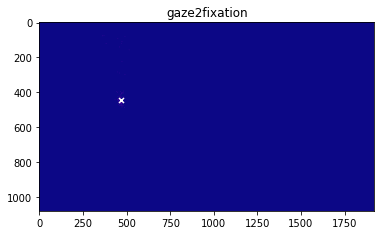

In [70]:
lines = lines.split('\n')

fx, fy = get_fixation_left(lines)
gaze_left_pos = get_gaze_pos_left(lines)

# Calculate mean of gaze samples associated to fixation
avg = gaze_left_pos.mean(axis=0)
std = gaze_left_pos.std(axis=0)

print(f'Fixation X,Y: {fx:.2f}, {fy:.2f}')
print(f'Mean Gaze X,Y: {avg[0]:.2f}, {avg[1]:.2f}')
print(f'Variance Gaze X,Y: {std[0]:.2f}, {std[1]:.2f}')

# Plot gaze samples associated to fixation

X = gaze_left_pos.astype(int)[:, 0]
Y = gaze_left_pos.astype(int)[:, 1]

canvas = np.zeros((1080, 1920))
canvas[Y, X] = 1

plt.imshow(canvas, cmap='plasma')
plt.scatter([fx], [fy], s=[25], c=['#ffffff'], marker='x')
plt.title('gaze2fixation')
plt.show()

## byq1.csv

Gaze samples associated to fixation from `byq1.csv` has many outliers heavily scattered around the centroid.

In [71]:
# From byq1.csv
lines = """SFIX L   9127628
9127628	 1067.9	  158.1	 3991.0	  966.8	   53.6	 3929.0	.....
9127628	 1065.6	  155.6	 4005.0	  971.0	   52.1	 3930.0	.....
9127629	 1067.7	  165.6	 3996.0	  969.1	   63.8	 3931.0	.....
9127629	 1067.6	  159.7	 4019.0	  969.4	   55.5	 3947.0	.....
9127630	 1066.4	  162.1	 3987.0	  967.8	   53.6	 3918.0	.....
9127630	 1062.8	  153.5	 3982.0	  965.3	   44.3	 3960.0	.....
MSG	9127631 _MousePosition_ 935 162
9127631	 1063.5	  159.7	 3986.0	  968.2	   51.9	 3938.0	.....
9127631	 1069.3	  166.4	 4007.0	  971.1	   54.1	 3940.0	.....
9127632	 1064.9	  160.4	 4016.0	  970.7	   50.6	 3961.0	.....
9127632	 1064.4	  162.6	 4020.0	  968.8	   46.5	 3936.0	.....
9127633	 1065.0	  164.0	 4001.0	  966.6	   50.1	 3939.0	.....
9127633	 1065.9	  156.8	 3991.0	  963.8	   51.9	 3917.0	.....
9127634	 1070.4	  157.0	 4014.0	  974.4	   57.5	 3945.0	.....
9127634	 1070.5	  160.9	 4007.0	  967.0	   51.5	 3927.0	.....
9127635	 1068.6	  159.7	 4015.0	  970.5	   47.1	 3955.0	.....
9127635	 1068.9	  158.1	 4000.0	  972.9	   49.1	 3942.0	.....
9127636	 1068.5	  157.7	 4007.0	  972.8	   43.8	 3940.0	.....
9127636	 1062.7	  155.7	 3991.0	  970.9	   53.6	 3932.0	.....
9127637	 1070.8	  165.9	 4018.0	  972.5	   66.2	 3945.0	.....
9127637	 1067.5	  160.2	 4025.0	  970.0	   45.0	 3951.0	.....
9127638	 1071.4	  163.0	 4005.0	  971.4	   50.7	 3925.0	.....
9127638	 1068.0	  156.8	 3991.0	  972.3	   50.7	 3934.0	.....
9127639	 1068.3	  155.5	 4006.0	  972.8	   38.8	 3946.0	.....
9127639	 1067.6	  156.6	 4018.0	  971.2	   41.2	 3942.0	.....
9127640	 1068.0	  154.6	 4015.0	  972.8	   51.3	 3949.0	.....
9127640	 1069.6	  153.4	 4009.0	  972.7	   36.8	 3950.0	.....
9127641	 1074.2	  160.7	 3976.0	  975.7	   54.7	 3932.0	.....
9127641	 1066.5	  162.4	 3993.0	  973.0	   47.7	 3946.0	.....
9127642	 1073.4	  157.7	 3993.0	  974.2	   52.4	 3926.0	.....
9127642	 1072.1	  158.6	 3982.0	  971.2	   41.2	 3929.0	.....
9127643	 1071.2	  156.3	 4021.0	  977.5	   52.0	 3942.0	.....
9127643	 1071.2	  155.6	 4017.0	  972.7	   45.5	 3963.0	.....
9127644	 1071.1	  165.7	 3991.0	  977.9	   56.9	 3926.0	.....
9127644	 1071.7	  160.0	 3992.0	  976.5	   49.5	 3939.0	.....
9127645	 1074.9	  159.2	 4007.0	  979.2	   50.6	 3936.0	.....
9127645	 1074.8	  159.2	 4008.0	  977.5	   42.0	 3944.0	.....
9127646	 1078.9	  168.6	 4023.0	  975.2	   48.3	 3944.0	.....
9127646	 1071.3	  148.0	 4029.0	  972.4	   49.4	 3936.0	.....
9127647	 1070.7	  151.3	 3985.0	  973.4	   46.7	 3935.0	.....
9127647	 1076.4	  157.7	 4009.0	  971.8	   46.5	 3945.0	.....
MSG	9127648 _MousePosition_ 933 162
9127648	 1075.9	  156.3	 4014.0	  969.8	   49.1	 3937.0	.....
9127648	 1079.7	  156.4	 4017.0	  974.8	   53.5	 3951.0	.....
9127649	 1078.9	  160.7	 4012.0	  968.9	   46.7	 3934.0	.....
9127649	 1077.0	  160.0	 4017.0	  970.6	   43.6	 3947.0	.....
9127650	 1072.6	  156.8	 3983.0	  974.0	   47.7	 3919.0	.....
9127650	 1071.6	  162.6	 3980.0	  971.8	   48.8	 3917.0	.....
9127651	 1072.9	  162.0	 4024.0	  971.6	   49.5	 3929.0	.....
9127651	 1077.1	  161.9	 4019.0	  972.9	   48.9	 3940.0	.....
9127652	 1071.7	  158.9	 4005.0	  971.0	   43.6	 3941.0	.....
9127652	 1075.5	  153.8	 3997.0	  972.8	   48.6	 3930.0	.....
9127653	 1077.4	  159.0	 4016.0	  972.2	   44.3	 3947.0	.....
9127653	 1074.4	  161.1	 4018.0	  972.8	   35.6	 3948.0	.....
9127654	 1074.8	  161.0	 3999.0	  969.6	   45.9	 3936.0	.....
9127654	 1071.7	  158.3	 4026.0	  972.2	   47.1	 3975.0	.....
9127655	 1075.9	  158.1	 4003.0	  974.3	   47.5	 3936.0	.....
9127655	 1076.3	  157.0	 3988.0	  971.7	   37.6	 3936.0	.....
9127656	 1075.0	  153.7	 4016.0	  966.9	   51.8	 3952.0	.....
9127656	 1077.1	  161.1	 4010.0	  967.1	   48.3	 3952.0	.....
9127657	 1075.8	  161.3	 3992.0	  969.6	   53.1	 3925.0	.....
9127657	 1068.8	  161.2	 4015.0	  970.3	   47.2	 3937.0	.....
9127658	 1079.0	  162.5	 4002.0	  967.5	   45.3	 3937.0	.....
9127658	 1074.5	  160.2	 4002.0	  966.7	   43.9	 3935.0	.....
9127659	 1074.6	  160.5	 4003.0	  969.0	   44.0	 3919.0	.....
9127659	 1074.2	  159.6	 4005.0	  970.3	   49.3	 3931.0	.....
9127660	 1077.8	  160.0	 4002.0	  970.0	   51.7	 3932.0	.....
9127660	 1073.7	  157.7	 3991.0	  973.5	   51.1	 3935.0	.....
9127661	 1075.0	  160.4	 4020.0	  969.1	   52.7	 3947.0	.....
9127661	 1073.6	  159.3	 3999.0	  967.5	   45.0	 3951.0	.....
9127662	 1072.7	  162.8	 4016.0	  971.0	   31.4	 3963.0	.....
9127662	 1074.4	  160.5	 4018.0	  967.4	   44.5	 3924.0	.....
9127663	 1076.4	  154.0	 4030.0	  964.2	   51.3	 3961.0	.....
9127663	 1075.6	  154.3	 4017.0	  971.6	   46.2	 3939.0	.....
9127664	 1072.1	  161.5	 4007.0	  972.0	   46.3	 3935.0	.....
9127664	 1075.7	  164.5	 4002.0	  964.4	   35.4	 3945.0	.....
9127665	 1076.8	  162.2	 4010.0	  966.9	   55.1	 3927.0	.....
9127665	 1076.6	  157.2	 3998.0	  969.7	   39.3	 3921.0	.....
MSG	9127666 _MousePosition_ 932 162
9127666	 1074.4	  160.4	 3994.0	  972.2	   54.7	 3922.0	.....
9127666	 1074.2	  159.7	 4013.0	  963.4	   48.3	 3931.0	.....
9127667	 1078.6	  163.9	 4036.0	  969.5	   36.6	 3957.0	.....
9127667	 1079.7	  159.5	 4013.0	  969.5	   41.3	 3945.0	.....
9127668	 1070.4	  160.5	 4021.0	  967.0	   45.2	 3928.0	.....
9127668	 1075.9	  161.8	 4037.0	  969.8	   53.6	 3948.0	.....
9127669	 1076.8	  166.6	 4023.0	  967.4	   46.6	 3941.0	.....
9127669	 1074.0	  163.7	 4008.0	  970.7	   40.4	 3938.0	.....
9127670	 1074.6	  162.0	 4022.0	  963.8	   48.9	 3942.0	.....
9127670	 1073.5	  160.5	 3998.0	  964.4	   42.0	 3926.0	.....
9127671	 1068.7	  156.5	 3999.0	  966.8	   52.2	 3931.0	.....
9127671	 1078.4	  160.0	 4010.0	  964.3	   49.8	 3930.0	.....
9127672	 1074.2	  164.1	 4013.0	  967.9	   43.5	 3935.0	.....
9127672	 1072.9	  163.4	 4012.0	  964.2	   42.1	 3937.0	.....
9127673	 1075.1	  154.2	 3991.0	  966.1	   48.0	 3935.0	.....
9127673	 1076.2	  158.2	 4015.0	  968.3	   46.2	 3931.0	.....
9127674	 1072.7	  151.9	 3998.0	  965.6	   48.2	 3926.0	.....
9127674	 1073.6	  158.5	 4003.0	  965.7	   38.3	 3934.0	.....
9127675	 1074.1	  164.8	 3983.0	  964.0	   43.4	 3931.0	.....
9127675	 1067.2	  156.9	 4014.0	  964.8	   48.7	 3927.0	.....
9127676	 1070.9	  159.8	 3988.0	  967.5	   43.2	 3941.0	.....
9127676	 1073.0	  163.6	 4019.0	  969.3	   41.7	 3945.0	.....
9127677	 1075.2	  167.8	 4000.0	  970.0	   35.0	 3940.0	.....
9127677	 1072.6	  159.0	 4004.0	  967.3	   37.9	 3953.0	.....
9127678	 1073.2	  165.7	 4014.0	  969.8	   41.1	 3961.0	.....
9127678	 1071.5	  154.3	 3992.0	  965.9	   46.0	 3939.0	.....
9127679	 1069.3	  162.2	 4012.0	  964.5	   41.8	 3933.0	.....
9127679	 1072.5	  164.6	 3996.0	  965.5	   49.9	 3920.0	.....
9127680	 1076.7	  159.3	 3994.0	  963.7	   39.5	 3929.0	.....
9127680	 1075.0	  159.5	 3979.0	  965.8	   44.0	 3916.0	.....
9127681	 1072.5	  159.5	 3983.0	  971.7	   43.9	 3924.0	.....
9127681	 1075.0	  168.7	 4015.0	  966.8	   44.6	 3942.0	.....
MSG	9127682 _MousePosition_ 931 162
9127682	 1076.5	  169.4	 4014.0	  966.5	   46.4	 3934.0	.....
9127682	 1073.2	  161.8	 3998.0	  961.8	   41.5	 3924.0	.....
9127683	 1075.1	  163.1	 4013.0	  969.0	   34.9	 3930.0	.....
9127683	 1073.6	  162.1	 4025.0	  970.8	   37.6	 3940.0	.....
9127684	 1072.3	  161.0	 3987.0	  964.2	   34.6	 3910.0	.....
9127684	 1071.2	  164.1	 4027.0	  965.5	   40.2	 3955.0	.....
9127685	 1071.2	  154.6	 4012.0	  968.7	   32.5	 3944.0	.....
9127685	 1071.8	  167.6	 4015.0	  968.1	   33.1	 3940.0	.....
9127686	 1069.4	  157.7	 4010.0	  965.6	   47.9	 3928.0	.....
9127686	 1071.9	  162.8	 4006.0	  964.0	   40.8	 3928.0	.....
9127687	 1070.4	  161.0	 3997.0	  961.5	   37.0	 3933.0	.....
9127687	 1076.0	  166.5	 4016.0	  966.6	   42.5	 3925.0	.....
9127688	 1075.0	  164.8	 4014.0	  970.5	   37.8	 3951.0	.....
9127688	 1073.6	  158.7	 3999.0	  961.8	   41.8	 3939.0	.....
9127689	 1077.1	  165.9	 3987.0	  966.3	   45.9	 3926.0	.....
9127689	 1072.5	  162.2	 4006.0	  964.2	   35.5	 3928.0	.....
9127690	 1070.3	  158.6	 3996.0	  962.4	   46.7	 3912.0	.....
9127690	 1070.7	  161.4	 4011.0	  967.2	   48.4	 3922.0	.....
9127691	 1071.2	  167.7	 4001.0	  968.4	   44.0	 3941.0	.....
9127691	 1072.3	  152.7	 4026.0	  965.3	   42.1	 3926.0	.....
9127692	 1074.2	  164.1	 4003.0	  962.6	   51.6	 3921.0	.....
9127692	 1067.1	  162.1	 4002.0	  964.2	   44.7	 3929.0	.....
9127693	 1074.1	  166.1	 4012.0	  965.0	   43.7	 3933.0	.....
9127693	 1069.9	  158.3	 4002.0	  965.5	   36.6	 3917.0	.....
9127694	 1070.8	  162.0	 4015.0	  964.3	   32.5	 3942.0	.....
9127694	 1071.1	  158.4	 4013.0	  966.0	   48.8	 3937.0	.....
9127695	 1075.1	  161.6	 4010.0	  965.7	   40.7	 3955.0	.....
9127695	 1074.0	  154.1	 4015.0	  964.8	   40.2	 3923.0	.....
9127696	 1074.4	  162.6	 4003.0	  959.7	   46.7	 3931.0	.....
9127696	 1070.8	  158.0	 4009.0	  966.7	   49.5	 3923.0	.....
9127697	 1070.7	  159.9	 3991.0	  969.0	   48.0	 3923.0	.....
9127697	 1074.8	  164.5	 4003.0	  964.2	   41.8	 3931.0	.....
9127698	 1070.4	  157.4	 4036.0	  964.8	   41.7	 3926.0	.....
9127698	 1069.7	  161.3	 3988.0	  962.6	   40.5	 3910.0	.....
MSG	9127699 _MousePosition_ 929 162
9127699	 1070.9	  157.9	 4039.0	  963.4	   41.7	 3947.0	.....
9127699	 1068.3	  158.9	 4013.0	  965.7	   37.9	 3929.0	.....
9127700	 1069.7	  159.7	 4003.0	  965.2	   44.6	 3914.0	.....
9127700	 1068.8	  154.5	 4029.0	  961.8	   49.5	 3925.0	.....
9127701	 1070.6	  156.1	 4022.0	  967.1	   51.0	 3939.0	.....
9127701	 1072.2	  158.3	 4016.0	  969.0	   45.5	 3930.0	.....
9127702	 1068.1	  163.6	 4021.0	  968.5	   30.4	 3959.0	.....
9127702	 1072.1	  153.9	 4031.0	  966.7	   38.1	 3940.0	.....
9127703	 1069.6	  157.2	 3983.0	  965.6	   44.8	 3907.0	.....
9127703	 1070.4	  158.6	 4009.0	  964.7	   41.0	 3947.0	.....
9127704	 1069.0	  165.8	 4000.0	  965.5	   51.3	 3928.0	.....
9127704	 1071.1	  157.4	 4018.0	  966.6	   48.4	 3933.0	.....
9127705	 1073.8	  166.3	 3983.0	  962.7	   55.9	 3899.0	.....
9127705	 1070.9	  163.2	 3998.0	  964.5	   52.8	 3910.0	.....
9127706	 1071.9	  154.0	 4031.0	  965.5	   40.6	 3946.0	.....
9127706	 1070.4	  159.4	 4003.0	  965.3	   46.6	 3910.0	.....
9127707	 1073.2	  169.5	 3996.0	  967.6	   40.0	 3938.0	.....
9127707	 1071.9	  158.5	 4001.0	  967.4	   35.1	 3923.0	.....
9127708	 1068.5	  157.8	 4003.0	  962.5	   40.9	 3937.0	.....
9127708	 1071.4	  159.9	 3996.0	  969.2	   47.3	 3914.0	.....
9127709	 1069.5	  159.4	 4014.0	  962.2	   49.7	 3931.0	.....
9127709	 1071.0	  159.0	 4007.0	  966.6	   45.7	 3922.0	.....
9127710	 1071.8	  164.5	 4018.0	  963.4	   43.6	 3925.0	.....
9127710	 1068.0	  162.8	 4002.0	  965.7	   52.3	 3941.0	.....
9127711	 1067.3	  153.1	 3997.0	  961.6	   47.9	 3918.0	.....
9127711	 1071.6	  162.0	 4005.0	  966.0	   47.3	 3915.0	.....
9127712	 1065.6	  157.8	 3998.0	  963.8	   39.7	 3935.0	.....
9127712	 1074.9	  162.9	 4000.0	  966.9	   30.7	 3942.0	.....
9127713	 1068.1	  161.7	 4005.0	  966.5	   42.5	 3947.0	.....
9127713	 1073.4	  157.2	 3999.0	  963.9	   50.8	 3902.0	.....
9127714	 1071.8	  164.1	 4000.0	  960.5	   49.4	 3931.0	.....
9127714	 1068.7	  162.4	 4023.0	  964.5	   41.4	 3952.0	.....
9127715	 1073.2	  158.5	 4023.0	  969.2	   30.5	 3950.0	.....
9127715	 1070.6	  164.5	 4004.0	  963.3	   41.5	 3940.0	.....
MSG	9127716 _MousePosition_ 927 163
9127716	 1074.0	  164.6	 3996.0	  966.5	   46.9	 3919.0	.....
9127716	 1067.4	  159.4	 4017.0	  961.7	   43.5	 3924.0	.....
9127717	 1072.2	  162.6	 3994.0	  961.7	   37.7	 3943.0	.....
9127717	 1071.2	  163.9	 3994.0	  968.0	   51.9	 3932.0	.....
9127718	 1070.6	  157.3	 4017.0	  966.3	   52.5	 3927.0	.....
9127718	 1067.2	  156.1	 4001.0	  964.4	   38.8	 3932.0	.....
9127719	 1068.2	  161.4	 3988.0	  969.0	   47.6	 3910.0	.....
9127719	 1075.4	  165.6	 4016.0	  966.8	   49.9	 3923.0	.....
9127720	 1070.2	  156.8	 4017.0	  964.6	   47.4	 3911.0	.....
9127720	 1072.1	  165.9	 4001.0	  962.5	   44.9	 3930.0	.....
9127721	 1068.2	  160.3	 3990.0	  968.8	   43.1	 3912.0	.....
9127721	 1072.5	  168.2	 4002.0	  964.5	   44.3	 3917.0	.....
9127722	 1073.3	  169.8	 4005.0	  966.3	   42.1	 3925.0	.....
9127722	 1069.6	  164.4	 4010.0	  967.4	   45.1	 3932.0	.....
9127723	 1071.8	  156.2	 4026.0	  962.3	   35.1	 3933.0	.....
9127723	 1065.6	  159.4	 4019.0	  970.2	   37.6	 3942.0	.....
9127724	 1069.9	  158.7	 3993.0	  962.8	   44.0	 3923.0	.....
9127724	 1067.7	  158.1	 4004.0	  962.7	   46.6	 3920.0	.....
9127725	 1070.0	  165.9	 4012.0	  965.0	   38.0	 3936.0	.....
9127725	 1069.4	  161.8	 3982.0	  965.2	   48.9	 3913.0	.....
9127726	 1068.6	  156.7	 4002.0	  960.0	   42.9	 3924.0	.....
9127726	 1069.4	  160.6	 3995.0	  967.8	   50.8	 3925.0	.....
9127727	 1068.9	  158.4	 3992.0	  963.1	   50.4	 3913.0	.....
9127727	 1065.8	  158.3	 4015.0	  965.6	   40.3	 3927.0	.....
9127728	 1070.8	  160.8	 3997.0	  964.2	   42.4	 3925.0	.....
9127728	 1070.1	  157.0	 3995.0	  967.0	   45.9	 3917.0	.....
9127729	 1067.3	  162.0	 4015.0	  963.4	   34.7	 3948.0	.....
9127729	 1072.4	  160.5	 4006.0	  965.9	   56.0	 3912.0	.....
9127730	 1070.4	  160.6	 4006.0	  968.4	   40.7	 3932.0	.....
9127730	 1072.3	  165.9	 4001.0	  965.1	   44.8	 3910.0	.....
9127731	 1070.3	  158.1	 3999.0	  964.0	   41.3	 3933.0	.....
9127731	 1072.3	  161.6	 4005.0	  967.3	   43.2	 3934.0	.....
9127732	 1068.3	  158.0	 4023.0	  964.6	   52.5	 3912.0	.....
9127732	 1071.3	  155.7	 4012.0	  967.5	   42.6	 3932.0	.....
MSG	9127733 _MousePosition_ 927 163
9127733	 1070.3	  158.9	 4035.0	  967.7	   40.9	 3922.0	.....
9127733	 1065.0	  160.9	 4004.0	  964.8	   47.1	 3932.0	.....
9127734	 1070.9	  165.6	 3995.0	  964.6	   45.8	 3911.0	.....
9127734	 1067.7	  163.5	 4002.0	  960.7	   43.3	 3926.0	.....
9127735	 1065.7	  157.2	 4016.0	  968.5	   44.6	 3949.0	.....
9127735	 1069.8	  163.0	 4001.0	  972.0	   36.3	 3925.0	.....
9127736	 1069.4	  164.8	 4002.0	  964.8	   44.3	 3919.0	.....
9127736	 1072.1	  163.7	 4015.0	  967.2	   49.5	 3920.0	.....
9127737	 1065.9	  151.3	 4024.0	  966.9	   48.9	 3904.0	.....
9127737	 1064.4	  157.5	 4008.0	  969.3	   42.7	 3946.0	.....
9127738	 1069.1	  158.4	 4015.0	  967.5	   39.1	 3946.0	.....
9127738	 1068.0	  160.4	 4005.0	  965.2	   48.6	 3915.0	.....
9127739	 1067.4	  164.0	 4015.0	  961.6	   39.3	 3918.0	.....
9127739	 1067.3	  158.9	 3985.0	  967.3	   49.5	 3912.0	.....
9127740	 1066.3	  161.2	 4005.0	  967.4	   42.5	 3935.0	.....
9127740	 1068.3	  161.3	 4012.0	  962.3	   46.6	 3922.0	.....
9127741	 1070.1	  168.0	 3995.0	  967.0	   51.0	 3907.0	.....
9127741	 1067.7	  162.4	 3994.0	  966.4	   47.5	 3910.0	.....
9127742	 1068.4	  161.3	 3998.0	  965.8	   42.4	 3908.0	.....
9127742	 1068.6	  165.5	 4006.0	  969.0	   46.1	 3932.0	.....
9127743	 1067.7	  158.2	 4030.0	  968.6	   44.7	 3939.0	.....
9127743	 1066.4	  160.3	 3998.0	  960.8	   43.8	 3930.0	.....
9127744	 1066.7	  157.9	 4005.0	  960.4	   41.4	 3916.0	.....
9127744	 1067.5	  165.9	 3989.0	  965.0	   46.5	 3903.0	.....
9127745	 1070.4	  162.2	 3997.0	  969.5	   55.6	 3903.0	.....
9127745	 1066.6	  164.9	 4018.0	  969.8	   54.0	 3945.0	.....
9127746	 1067.4	  164.2	 3998.0	  964.8	   53.4	 3912.0	.....
9127746	 1065.8	  160.7	 3994.0	  964.7	   48.2	 3914.0	.....
9127747	 1066.6	  161.0	 4016.0	  963.5	   52.6	 3921.0	.....
9127747	 1069.6	  161.0	 4004.0	  965.6	   51.6	 3921.0	.....
9127748	 1070.0	  155.0	 4020.0	  964.9	   46.2	 3921.0	.....
9127748	 1068.4	  158.7	 4016.0	  964.6	   37.2	 3925.0	.....
9127749	 1064.9	  161.1	 4009.0	  969.2	   45.8	 3932.0	.....
9127749	 1069.1	  159.6	 4001.0	  963.1	   44.1	 3912.0	.....
MSG	9127750 _MousePosition_ 927 163
9127750	 1067.0	  157.2	 4004.0	  964.1	   41.5	 3916.0	.....
9127750	 1063.3	  161.1	 4018.0	  967.5	   36.6	 3928.0	.....
9127751	 1069.5	  150.3	 3988.0	  966.2	   61.2	 3899.0	.....
9127751	 1065.6	  160.7	 4007.0	  965.6	   45.7	 3927.0	.....
9127752	 1066.6	  169.5	 3995.0	  967.6	   52.5	 3913.0	.....
9127752	 1067.0	  162.0	 4029.0	  966.0	   42.7	 3929.0	.....
9127753	 1065.5	  157.4	 3998.0	  967.2	   42.9	 3926.0	.....
9127753	 1066.0	  157.7	 3990.0	  965.1	   46.8	 3915.0	.....
9127754	 1068.3	  159.3	 4024.0	  969.4	   45.6	 3924.0	.....
9127754	 1070.8	  157.6	 4012.0	  970.0	   47.3	 3914.0	.....
9127755	 1069.5	  163.7	 4012.0	  966.3	   38.6	 3906.0	.....
9127755	 1067.2	  162.1	 4004.0	  964.3	   46.8	 3927.0	.....
9127756	 1069.0	  163.0	 3993.0	  962.8	   39.8	 3916.0	.....
9127756	 1066.2	  164.2	 4005.0	  968.5	   49.6	 3923.0	.....
9127757	 1064.6	  159.4	 3987.0	  968.1	   53.2	 3920.0	.....
9127757	 1067.6	  161.5	 3996.0	  969.6	   49.1	 3901.0	.....
9127758	 1066.7	  158.5	 4027.0	  969.7	   41.6	 3940.0	.....
9127758	 1063.8	  163.4	 3989.0	  969.1	   48.7	 3938.0	.....
9127759	 1065.4	  163.6	 3980.0	  969.5	   44.7	 3896.0	.....
9127759	 1068.9	  163.7	 3993.0	  965.6	   48.7	 3910.0	.....
9127760	 1069.5	  165.9	 4015.0	  968.1	   41.9	 3928.0	.....
9127760	 1070.9	  161.7	 3999.0	  969.6	   54.3	 3910.0	.....
9127761	 1068.3	  167.8	 4035.0	  969.2	   50.8	 3938.0	.....
9127761	 1065.1	  161.1	 3982.0	  970.8	   39.9	 3926.0	.....
9127762	 1065.2	  158.4	 3994.0	  965.5	   49.0	 3901.0	.....
9127762	 1067.8	  168.4	 3994.0	  969.8	   49.9	 3913.0	.....
9127763	 1068.8	  165.1	 4012.0	  965.4	   50.3	 3931.0	.....
9127763	 1066.0	  160.8	 3982.0	  967.9	   45.3	 3904.0	.....
9127764	 1066.9	  166.4	 3989.0	  966.1	   50.7	 3911.0	.....
9127764	 1067.3	  162.6	 3996.0	  966.3	   50.4	 3914.0	.....
9127765	 1065.8	  162.6	 4028.0	  966.8	   32.8	 3952.0	.....
9127765	 1065.2	  164.0	 4018.0	  967.3	   49.9	 3920.0	.....
9127766	 1068.2	  160.3	 3999.0	  965.9	   37.1	 3922.0	.....
9127766	 1068.4	  163.2	 4027.0	  966.3	   50.8	 3918.0	.....
MSG	9127767 _MousePosition_ 927 163
9127767	 1066.7	  157.8	 3998.0	  968.3	   49.3	 3917.0	.....
9127767	 1067.1	  158.6	 4002.0	  970.5	   53.9	 3923.0	.....
9127768	 1064.3	  159.7	 3997.0	  966.0	   50.9	 3909.0	.....
9127768	 1068.8	  164.1	 3993.0	  965.2	   50.0	 3892.0	.....
9127769	 1070.4	  168.8	 4013.0	  970.4	   50.1	 3924.0	.....
9127769	 1067.2	  157.5	 3988.0	  964.2	   39.4	 3916.0	.....
9127770	 1065.9	  160.1	 3994.0	  964.7	   55.8	 3898.0	.....
9127770	 1068.1	  169.0	 3994.0	  962.4	   55.3	 3904.0	.....
9127771	 1070.6	  164.6	 3999.0	  969.9	   41.7	 3920.0	.....
9127771	 1065.2	  165.7	 4031.0	  965.1	   44.3	 3937.0	.....
9127772	 1067.7	  164.9	 4016.0	  964.8	   42.9	 3916.0	.....
9127772	 1064.4	  163.4	 3979.0	  971.7	   45.0	 3920.0	.....
9127773	 1065.5	  164.4	 4002.0	  966.5	   44.3	 3941.0	.....
9127773	 1060.0	  163.3	 3998.0	  966.1	   53.6	 3907.0	.....
9127774	 1064.2	  158.5	 4040.0	  971.0	   49.9	 3934.0	.....
9127774	 1063.4	  164.3	 4001.0	  967.5	   48.0	 3903.0	.....
9127775	 1065.3	  158.6	 4018.0	  966.8	   48.6	 3933.0	.....
9127775	 1064.3	  163.7	 4009.0	  965.3	   50.0	 3921.0	.....
9127776	 1067.1	  164.0	 4001.0	  972.1	   50.0	 3919.0	.....
9127776	 1062.3	  161.6	 3992.0	  971.1	   42.1	 3935.0	.....
9127777	 1064.6	  163.3	 4022.0	  967.8	   43.4	 3910.0	.....
9127777	 1064.7	  160.4	 3992.0	  968.2	   47.8	 3915.0	.....
9127778	 1066.8	  161.5	 3989.0	  969.3	   54.9	 3934.0	.....
9127778	 1066.5	  161.3	 4007.0	  966.2	   51.6	 3926.0	.....
9127779	 1067.1	  164.1	 3987.0	  963.7	   51.6	 3906.0	.....
9127779	 1061.1	  169.6	 4005.0	  968.0	   48.5	 3920.0	.....
9127780	 1067.5	  159.3	 4020.0	  969.2	   39.4	 3931.0	.....
9127780	 1068.2	  161.6	 4005.0	  965.3	   44.8	 3934.0	.....
9127781	 1066.6	  165.4	 3996.0	  966.3	   55.4	 3924.0	.....
9127781	 1068.6	  164.8	 4000.0	  965.1	   45.5	 3917.0	.....
9127782	 1062.4	  163.8	 4004.0	  974.1	   54.5	 3921.0	.....
9127782	 1067.5	  173.7	 3997.0	  968.3	   40.5	 3924.0	.....
MSG	9127783 _MousePosition_ 927 163
9127783	 1066.6	  158.0	 4000.0	  967.6	   56.3	 3894.0	.....
9127783	 1065.9	  158.5	 4014.0	  965.4	   51.1	 3916.0	.....
9127784	 1067.7	  165.2	 3999.0	  966.1	   47.2	 3917.0	.....
9127784	 1065.2	  158.5	 4018.0	  968.3	   40.0	 3936.0	.....
9127785	 1062.0	  160.7	 4008.0	  967.0	   53.0	 3906.0	.....
9127785	 1068.5	  164.9	 3996.0	  973.7	   51.3	 3907.0	.....
9127786	 1064.6	  167.7	 3995.0	  972.0	   51.3	 3918.0	.....
9127786	 1066.6	  169.2	 4009.0	  966.9	   57.0	 3900.0	.....
9127787	 1068.2	  156.2	 4016.0	  968.5	   46.8	 3924.0	.....
9127787	 1064.6	  167.9	 4019.0	  968.3	   46.3	 3930.0	.....
9127788	 1063.4	  157.8	 4001.0	  969.9	   40.1	 3918.0	.....
9127788	 1066.1	  164.0	 4010.0	  965.5	   52.7	 3920.0	.....
9127789	 1067.4	  156.2	 3996.0	  969.4	   50.7	 3913.0	.....
9127789	 1061.4	  155.1	 4007.0	  965.3	   56.7	 3921.0	.....
9127790	 1066.2	  167.8	 3998.0	  971.1	   50.5	 3940.0	.....
9127790	 1061.5	  159.3	 3995.0	  965.5	   50.1	 3917.0	.....
9127791	 1062.6	  159.1	 3989.0	  968.3	   64.7	 3915.0	.....
9127791	 1063.3	  161.1	 4004.0	  967.9	   47.1	 3920.0	.....
9127792	 1060.0	  163.7	 3973.0	  969.9	   53.9	 3890.0	.....
9127792	 1063.2	  163.8	 4018.0	  969.2	   49.7	 3905.0	.....
9127793	 1069.0	  167.2	 3973.0	  967.6	   54.7	 3891.0	.....
9127793	 1062.7	  163.7	 4004.0	  965.9	   48.7	 3909.0	.....
9127794	 1059.4	  154.7	 4021.0	  966.0	   44.6	 3925.0	.....
9127794	 1066.5	  171.0	 3993.0	  969.8	   50.8	 3934.0	.....
9127795	 1069.5	  165.7	 4001.0	  971.1	   44.1	 3909.0	.....
9127795	 1064.3	  154.3	 4001.0	  967.6	   53.6	 3891.0	.....
9127796	 1068.9	  163.4	 3989.0	  971.8	   51.5	 3906.0	.....
9127796	 1061.7	  166.4	 4007.0	  965.9	   56.8	 3907.0	.....
9127797	 1062.9	  161.5	 4026.0	  968.4	   57.1	 3912.0	.....
9127797	 1065.4	  164.5	 3986.0	  968.8	   57.6	 3884.0	.....
9127798	 1066.7	  169.4	 4018.0	  965.1	   51.1	 3933.0	.....
9127798	 1067.0	  163.4	 3994.0	  968.6	   49.8	 3912.0	.....
9127799	 1062.6	  166.6	 4007.0	  966.5	   45.7	 3947.0	.....
9127799	 1062.8	  159.2	 3983.0	  966.4	   54.2	 3902.0	.....
MSG	9127800 _MousePosition_ 927 163
9127800	 1061.1	  160.9	 3998.0	  964.0	   61.0	 3895.0	.....
9127800	 1061.8	  153.3	 3994.0	  969.2	   64.4	 3909.0	.....
9127801	 1063.4	  163.1	 4005.0	  963.1	   53.5	 3909.0	.....
9127801	 1061.5	  167.0	 4001.0	  969.1	   52.4	 3908.0	.....
9127802	 1063.5	  166.1	 3982.0	  967.1	   53.6	 3912.0	.....
9127802	 1061.8	  161.7	 4002.0	  966.7	   53.9	 3919.0	.....
9127803	 1066.3	  155.8	 4024.0	  970.0	   59.9	 3915.0	.....
9127803	 1070.6	  165.2	 3997.0	  969.8	   52.1	 3882.0	.....
9127804	 1069.2	  172.2	 3989.0	  970.3	   57.3	 3908.0	.....
9127804	 1060.9	  165.7	 3974.0	  970.4	   50.1	 3906.0	.....
9127805	 1064.8	  160.4	 3989.0	  969.2	   33.9	 3894.0	.....
9127805	 1060.7	  164.9	 3994.0	  968.9	   49.6	 3923.0	.....
9127806	 1068.2	  167.6	 3991.0	  967.9	   52.4	 3903.0	.....
9127806	 1059.6	  161.8	 3977.0	  969.5	   57.6	 3909.0	.....
9127807	 1065.7	  164.7	 3995.0	  967.0	   49.5	 3933.0	.....
9127807	 1060.5	  166.9	 3987.0	  971.8	   52.3	 3919.0	.....
9127808	 1066.3	  160.4	 3998.0	  971.4	   47.8	 3900.0	.....
9127808	 1067.3	  162.9	 4003.0	  967.5	   49.9	 3908.0	.....
9127809	 1062.1	  159.7	 4003.0	  967.6	   56.9	 3901.0	.....
9127809	 1063.6	  160.9	 3992.0	  966.8	   53.4	 3919.0	.....
9127810	 1063.0	  166.5	 3995.0	  967.1	   54.0	 3911.0	.....
9127810	 1068.4	  165.6	 4014.0	  969.3	   51.6	 3927.0	.....
9127811	 1064.5	  164.4	 3995.0	  964.7	   55.1	 3909.0	.....
9127811	 1063.6	  161.3	 3984.0	  971.2	   49.5	 3890.0	.....
9127812	 1063.0	  161.6	 4000.0	  966.1	   63.0	 3895.0	.....
9127812	 1064.9	  160.4	 4013.0	  964.4	   35.7	 3922.0	.....
9127813	 1065.3	  160.9	 3992.0	  966.8	   57.5	 3909.0	.....
9127813	 1066.4	  162.8	 4000.0	  966.3	   40.7	 3934.0	.....
9127814	 1059.3	  163.7	 3992.0	  964.0	   56.6	 3894.0	.....
9127814	 1059.7	  157.9	 3982.0	  967.9	   53.0	 3897.0	.....
9127815	 1064.8	  163.7	 3996.0	  970.4	   51.1	 3912.0	.....
9127815	 1061.6	  168.0	 3980.0	  965.5	   51.1	 3879.0	.....
9127816	 1064.4	  160.9	 3987.0	  963.8	   55.7	 3898.0	.....
9127816	 1065.1	  164.2	 4006.0	  964.8	   52.2	 3911.0	.....
9127817	 1064.9	  159.0	 3989.0	  965.4	   45.7	 3916.0	.....
9127817	 1059.6	  166.9	 3988.0	  971.9	   54.1	 3904.0	.....
MSG	9127818 _MousePosition_ 927 163
9127818	 1069.7	  165.9	 3997.0	  966.5	   54.9	 3892.0	.....
9127818	 1061.0	  159.8	 3993.0	  968.6	   48.0	 3917.0	.....
9127819	 1063.5	  166.5	 4004.0	  971.0	   51.1	 3917.0	.....
9127819	 1062.3	  160.0	 4019.0	  970.3	   39.7	 3891.0	.....
9127820	 1061.4	  156.7	 4006.0	  971.0	   50.3	 3907.0	.....
9127820	 1065.9	  170.1	 3971.0	  968.2	   57.6	 3898.0	.....
9127821	 1062.8	  159.3	 3995.0	  967.9	   39.1	 3906.0	.....
9127821	 1064.2	  169.2	 3986.0	  963.6	   53.4	 3904.0	.....
9127822	 1062.7	  158.2	 4010.0	  966.1	   52.8	 3889.0	.....
9127822	 1064.1	  162.0	 3966.0	  967.7	   45.8	 3896.0	.....
9127823	 1065.1	  165.4	 3981.0	  967.0	   56.0	 3892.0	.....
9127823	 1061.0	  167.9	 3997.0	  967.6	   51.6	 3893.0	.....
9127824	 1065.4	  162.2	 3989.0	  970.4	   48.2	 3916.0	.....
9127824	 1062.5	  160.5	 3983.0	  971.7	   56.9	 3891.0	.....
9127825	 1063.8	  157.0	 4004.0	  967.3	   48.5	 3894.0	.....
9127825	 1064.3	  162.2	 3973.0	  965.4	   53.7	 3906.0	.....
9127826	 1064.9	  163.2	 3985.0	  968.7	   59.0	 3892.0	.....
9127826	 1061.2	  163.7	 3986.0	  969.4	   49.7	 3903.0	.....
9127827	 1060.1	  157.2	 3996.0	  971.8	   42.9	 3917.0	.....
9127827	 1062.9	  166.3	 3986.0	  963.8	   43.6	 3915.0	.....
9127828	 1060.8	  162.6	 3993.0	  966.7	   58.5	 3901.0	.....
9127828	 1063.8	  164.7	 4010.0	  965.5	   49.6	 3922.0	.....
9127829	 1059.5	  164.7	 3991.0	  969.5	   44.8	 3899.0	.....
9127829	 1068.1	  167.7	 3996.0	  966.1	   49.2	 3914.0	.....
9127830	 1059.1	  160.9	 3990.0	  971.1	   58.0	 3888.0	.....
9127830	 1061.2	  160.9	 4001.0	  965.3	   42.3	 3909.0	.....
9127831	 1060.7	  163.2	 3989.0	  964.9	   49.2	 3904.0	.....
9127831	 1065.1	  156.4	 4015.0	  963.5	   47.0	 3911.0	.....
9127832	 1058.7	  159.1	 3983.0	  971.7	   50.8	 3903.0	.....
9127832	 1064.1	  165.6	 4000.0	  968.2	   48.3	 3902.0	.....
9127833	 1055.7	  159.0	 3980.0	  966.3	   53.0	 3905.0	.....
9127833	 1059.6	  157.3	 3976.0	  972.0	   43.9	 3922.0	.....
MSG	9127834 _MousePosition_ 927 163
9127834	 1061.4	  158.7	 3992.0	  967.7	   53.0	 3905.0	.....
9127834	 1060.5	  161.6	 4004.0	  966.7	   60.5	 3894.0	.....
9127835	 1063.3	  165.7	 3978.0	  962.7	   47.4	 3911.0	.....
9127835	 1061.8	  161.8	 4000.0	  966.9	   55.4	 3924.0	.....
9127836	 1060.0	  162.5	 3981.0	  968.2	   50.3	 3901.0	.....
9127836	 1057.9	  163.2	 3978.0	  972.1	   49.0	 3883.0	.....
9127837	 1059.4	  172.0	 3992.0	  968.8	   53.8	 3897.0	.....
9127837	 1059.1	  159.2	 3994.0	  966.2	   45.9	 3922.0	.....
9127838	 1059.4	  158.1	 3999.0	  965.5	   45.4	 3918.0	.....
9127838	 1062.6	  168.2	 4023.0	  969.6	   58.4	 3903.0	.....
9127839	 1060.9	  166.1	 3987.0	  967.9	   45.1	 3920.0	.....
9127839	 1062.7	  169.5	 3975.0	  968.8	   45.8	 3906.0	.....
9127840	 1064.1	  166.2	 3983.0	  970.6	   56.5	 3887.0	.....
9127840	 1063.5	  165.7	 3967.0	  966.9	   53.3	 3890.0	.....
9127841	 1060.4	  155.8	 3986.0	  970.0	   51.5	 3901.0	.....
9127841	 1058.0	  164.9	 3970.0	  969.0	   47.8	 3892.0	.....
9127842	 1060.8	  169.6	 3993.0	  970.5	   42.5	 3923.0	.....
9127842	 1056.8	  168.2	 4007.0	  970.5	   54.9	 3918.0	.....
9127843	 1062.7	  163.1	 3995.0	  967.4	   55.9	 3904.0	.....
9127843	 1060.2	  161.3	 4001.0	  967.0	   55.2	 3900.0	.....
9127844	 1056.6	  157.8	 3971.0	  968.2	   50.6	 3897.0	.....
9127844	 1060.3	  166.3	 3974.0	  966.0	   56.2	 3891.0	.....
9127845	 1060.5	  164.1	 3967.0	  968.0	   52.1	 3884.0	.....
9127845	 1057.3	  166.7	 3977.0	  969.4	   49.9	 3904.0	.....
9127846	 1060.8	  172.5	 3969.0	  967.6	   59.0	 3870.0	.....
9127846	 1055.8	  155.6	 3990.0	  969.5	   55.6	 3887.0	.....
9127847	 1056.5	  160.1	 3953.0	  968.2	   61.3	 3876.0	.....
9127847	 1058.4	  165.8	 3979.0	  966.6	   59.5	 3886.0	.....
9127848	 1059.1	  158.6	 3976.0	  967.0	   50.2	 3885.0	.....
9127848	 1060.7	  168.3	 3966.0	  970.6	   52.8	 3884.0	.....
9127849	 1060.5	  162.4	 3998.0	  967.7	   51.9	 3911.0	.....
9127849	 1062.0	  168.2	 3984.0	  967.0	   49.3	 3904.0	.....
9127850	 1061.4	  167.7	 3983.0	  966.3	   56.2	 3890.0	.....
9127850	 1057.9	  161.1	 3983.0	  971.8	   57.6	 3884.0	.....
MSG	9127851 _MousePosition_ 927 163
9127851	 1057.0	  168.1	 3979.0	  963.6	   53.7	 3869.0	.....
9127851	 1065.2	  166.9	 3987.0	  968.9	   54.3	 3884.0	.....
9127852	 1058.7	  158.7	 4003.0	  968.8	   50.0	 3893.0	.....
9127852	 1058.8	  160.6	 3968.0	  964.6	   50.4	 3888.0	.....
9127853	 1057.0	  159.1	 4001.0	  972.4	   49.4	 3922.0	.....
9127853	 1056.7	  161.4	 3987.0	  967.9	   54.8	 3904.0	.....
9127854	 1060.7	  163.9	 3985.0	  970.3	   53.7	 3887.0	.....
9127854	 1064.0	  168.3	 3979.0	  974.1	   54.4	 3891.0	.....
9127855	 1061.6	  164.3	 3988.0	  971.7	   57.8	 3885.0	.....
9127855	 1060.4	  168.2	 3989.0	  973.1	   54.8	 3903.0	.....
9127856	 1062.5	  164.2	 3963.0	  968.2	   53.7	 3881.0	.....
9127856	 1063.1	  167.1	 3954.0	  965.6	   52.0	 3863.0	.....
9127857	 1059.0	  165.9	 3978.0	  969.1	   60.2	 3892.0	.....
9127857	 1060.5	  161.5	 3998.0	  968.8	   43.2	 3909.0	.....
9127858	 1059.8	  161.4	 3992.0	  970.8	   43.5	 3911.0	.....
9127858	 1061.6	  161.5	 4001.0	  970.8	   58.0	 3908.0	.....
9127859	 1061.4	  162.1	 3999.0	  964.5	   59.7	 3890.0	.....
9127859	 1061.1	  161.9	 3975.0	  968.0	   44.8	 3891.0	.....
9127860	 1061.9	  160.3	 3997.0	  967.3	   67.9	 3899.0	.....
9127860	 1061.6	  164.3	 3966.0	  969.3	   60.2	 3888.0	.....
9127861	 1060.8	  172.8	 3976.0	  966.0	   41.0	 3885.0	.....
9127861	 1059.6	  168.1	 3973.0	  968.2	   43.7	 3895.0	.....
9127862	 1060.4	  164.8	 3972.0	  968.3	   53.3	 3901.0	.....
9127862	 1061.1	  159.8	 3983.0	  967.4	   48.5	 3885.0	.....
9127863	 1061.5	  171.9	 3988.0	  966.9	   59.5	 3894.0	.....
9127863	 1057.4	  164.0	 3956.0	  964.5	   60.2	 3881.0	.....
9127864	 1059.4	  171.6	 3967.0	  963.3	   60.2	 3865.0	.....
9127864	 1061.0	  168.2	 3980.0	  973.9	   60.9	 3889.0	.....
9127865	 1061.0	  167.1	 3962.0	  969.7	   41.1	 3892.0	.....
9127865	 1062.4	  170.3	 4019.0	  966.7	   52.6	 3904.0	.....
9127866	 1060.8	  166.1	 3977.0	  968.1	   59.5	 3893.0	.....
9127866	 1060.8	  173.4	 3979.0	  965.2	   60.7	 3880.0	.....
9127867	 1059.8	  164.4	 3972.0	  966.1	   53.9	 3896.0	.....
9127867	 1062.2	  161.2	 3975.0	  966.9	   48.4	 3890.0	.....
9127868	 1054.9	  167.2	 3985.0	  967.6	   47.4	 3901.0	.....
9127868	 1060.1	  161.0	 3986.0	  968.1	   57.0	 3875.0	.....
MSG	9127869 _MousePosition_ 935 163
9127869	 1059.6	  169.3	 3984.0	  971.1	   52.7	 3918.0	.....
9127869	 1060.4	  168.6	 3982.0	  968.5	   49.8	 3913.0	.....
9127870	 1062.0	  167.8	 3984.0	  964.4	   51.1	 3906.0	.....
9127870	 1065.7	  169.1	 3967.0	  965.5	   56.7	 3887.0	.....
9127871	 1060.4	  166.7	 3966.0	  965.1	   47.5	 3891.0	.....
9127871	 1057.1	  160.8	 3988.0	  967.0	   47.0	 3911.0	.....
9127872	 1059.6	  170.0	 3978.0	  970.9	   37.7	 3904.0	.....
9127872	 1058.1	  164.1	 3980.0	  964.8	   54.1	 3892.0	.....
9127873	 1061.2	  165.0	 3977.0	  969.5	   51.0	 3896.0	.....
9127873	 1061.4	  160.3	 3974.0	  968.4	   61.4	 3897.0	.....
9127874	 1063.5	  167.7	 3975.0	  969.6	   65.0	 3889.0	.....
9127874	 1056.6	  165.3	 3964.0	  972.3	   52.8	 3875.0	.....
9127875	 1060.1	  164.4	 3979.0	  967.5	   58.2	 3904.0	.....
9127875	 1063.5	  167.1	 3948.0	  966.0	   56.2	 3873.0	.....
9127876	 1059.7	  167.8	 3967.0	  965.1	   58.2	 3871.0	.....
9127876	 1057.4	  162.3	 3972.0	  960.9	   55.1	 3873.0	.....
9127877	 1061.2	  164.6	 3973.0	  964.5	   56.0	 3878.0	.....
9127877	 1061.1	  161.7	 3965.0	  969.4	   60.7	 3889.0	.....
9127878	 1057.1	  171.1	 3959.0	  964.6	   48.7	 3872.0	.....
9127878	 1060.4	  167.4	 3975.0	  970.9	   58.5	 3913.0	.....
9127879	 1060.7	  166.2	 3965.0	  965.5	   57.0	 3896.0	.....
9127879	 1059.4	  172.8	 3969.0	  964.5	   53.8	 3887.0	.....
9127880	 1058.2	  162.6	 3980.0	  962.7	   55.2	 3873.0	.....
9127880	 1057.7	  164.2	 3974.0	  963.6	   51.8	 3886.0	.....
9127881	 1060.9	  158.3	 3992.0	  965.3	   55.2	 3886.0	.....
9127881	 1057.3	  160.2	 3962.0	  971.1	   61.7	 3884.0	.....
9127882	 1059.5	  165.6	 3963.0	  969.6	   61.4	 3901.0	.....
9127882	 1059.7	  165.0	 3945.0	  971.3	   60.3	 3868.0	.....
9127883	 1059.4	  163.0	 3959.0	  968.5	   48.0	 3909.0	.....
9127883	 1059.1	  169.7	 3965.0	  965.2	   58.4	 3856.0	.....
9127884	 1059.8	  168.5	 3976.0	  964.8	   60.0	 3909.0	.....
9127884	 1059.8	  169.1	 3991.0	  969.4	   64.3	 3880.0	.....
MSG	9127885 _MousePosition_ 945 163
9127885	 1060.4	  173.3	 3947.0	  967.3	   61.6	 3895.0	.....
9127885	 1062.0	  166.7	 3986.0	  969.3	   67.4	 3882.0	.....
9127886	 1059.6	  167.3	 3984.0	  965.9	   55.6	 3897.0	.....
9127886	 1061.6	  168.9	 3960.0	  968.1	   52.8	 3883.0	.....
9127887	 1060.0	  169.2	 3961.0	  966.6	   60.0	 3893.0	.....
9127887	 1058.8	  167.0	 3966.0	  967.5	   59.7	 3887.0	.....
9127888	 1055.5	  169.6	 3972.0	  968.8	   55.9	 3893.0	.....
9127888	 1057.7	  166.2	 3965.0	  965.0	   52.7	 3907.0	.....
9127889	 1063.9	  170.1	 3967.0	  969.2	   56.2	 3902.0	.....
9127889	 1061.8	  174.0	 3951.0	  967.6	   59.6	 3870.0	.....
9127890	 1057.8	  168.9	 3971.0	  965.9	   55.9	 3888.0	.....
9127890	 1060.9	  168.4	 3949.0	  966.8	   63.6	 3854.0	.....
9127891	 1063.8	  165.2	 3998.0	  964.6	   61.6	 3891.0	.....
9127891	 1059.4	  159.2	 3964.0	  964.9	   61.4	 3881.0	.....
9127892	 1056.1	  167.4	 3969.0	  965.9	   56.3	 3893.0	.....
9127892	 1062.3	  165.1	 3953.0	  966.9	   53.5	 3869.0	.....
9127893	 1059.1	  167.3	 3965.0	  966.9	   53.6	 3885.0	.....
9127893	 1060.9	  170.3	 3968.0	  969.8	   61.2	 3905.0	.....
9127894	 1057.8	  163.8	 3953.0	  967.7	   57.0	 3850.0	.....
9127894	 1055.1	  157.4	 3991.0	  966.0	   60.2	 3880.0	.....
9127895	 1054.7	  167.5	 3974.0	  968.7	   55.5	 3872.0	.....
9127895	 1061.2	  172.8	 3950.0	  963.8	   43.6	 3894.0	.....
9127896	 1063.5	  167.3	 3980.0	  969.0	   49.1	 3887.0	.....
9127896	 1057.0	  159.3	 3982.0	  969.3	   58.2	 3887.0	.....
9127897	 1060.1	  159.9	 3962.0	  966.4	   67.0	 3885.0	.....
9127897	 1058.6	  168.1	 3992.0	  968.9	   55.2	 3904.0	.....
9127898	 1058.7	  163.9	 3976.0	  967.8	   53.9	 3898.0	.....
9127898	 1059.5	  169.5	 3965.0	  965.1	   49.3	 3895.0	.....
9127899	 1057.2	  168.5	 3956.0	  965.6	   49.8	 3881.0	.....
9127899	 1059.2	  162.2	 3968.0	  968.1	   51.5	 3897.0	.....
9127900	 1061.7	  166.3	 3947.0	  964.2	   54.7	 3875.0	.....
9127900	 1062.1	  171.5	 3951.0	  964.8	   67.9	 3867.0	.....
9127901	 1060.8	  171.0	 3973.0	  970.6	   56.0	 3883.0	.....
9127901	 1060.4	  166.1	 3963.0	  966.7	   51.5	 3871.0	.....
MSG	9127902 _MousePosition_ 954 163
9127902	 1055.5	  172.3	 3947.0	  966.7	   67.5	 3855.0	.....
9127902	 1065.0	  166.7	 3942.0	  970.2	   63.1	 3879.0	.....
9127903	 1059.0	  167.3	 3972.0	  965.7	   55.0	 3881.0	.....
9127903	 1057.4	  169.9	 3942.0	  966.5	   55.4	 3867.0	.....
9127904	 1061.3	  164.8	 3959.0	  969.0	   55.3	 3875.0	.....
9127904	 1058.8	  165.8	 3950.0	  967.2	   59.4	 3877.0	.....
9127905	 1059.5	  172.8	 3956.0	  968.8	   50.6	 3880.0	.....
9127905	 1061.9	  171.7	 3957.0	  964.5	   57.7	 3888.0	.....
9127906	 1064.0	  174.6	 3950.0	  966.2	   49.4	 3879.0	.....
9127906	 1058.8	  163.7	 3952.0	  971.7	   54.4	 3876.0	.....
9127907	 1065.5	  165.8	 3961.0	  967.1	   51.6	 3877.0	.....
9127907	 1056.2	  163.3	 3963.0	  968.4	   49.2	 3902.0	.....
9127908	 1057.6	  170.3	 3969.0	  964.9	   58.6	 3882.0	.....
9127908	 1059.4	  166.9	 3936.0	  963.7	   66.8	 3873.0	.....
9127909	 1059.8	  164.0	 3947.0	  967.5	   56.7	 3874.0	.....
9127909	 1062.3	  162.8	 3970.0	  963.5	   49.1	 3885.0	.....
9127910	 1055.3	  162.6	 3955.0	  968.4	   52.0	 3881.0	.....
9127910	 1058.8	  164.5	 3962.0	  964.3	   59.6	 3889.0	.....
9127911	 1059.3	  165.5	 3940.0	  966.2	   62.5	 3874.0	.....
9127911	 1059.1	  170.6	 3954.0	  967.2	   62.7	 3864.0	.....
9127912	 1054.4	  164.3	 3930.0	  964.9	   68.0	 3844.0	.....
9127912	 1057.9	  170.3	 3968.0	  968.5	   57.8	 3894.0	.....
9127913	 1057.5	  171.3	 3954.0	  965.2	   50.3	 3894.0	.....
9127913	 1057.5	  166.9	 3968.0	  965.6	   53.0	 3868.0	.....
9127914	 1057.9	  166.1	 3967.0	  967.3	   54.4	 3869.0	.....
9127914	 1059.3	  169.9	 3935.0	  966.7	   63.9	 3854.0	.....
9127915	 1054.1	  154.9	 3990.0	  966.4	   57.6	 3885.0	.....
9127915	 1059.0	  172.7	 3941.0	  965.1	   54.3	 3891.0	.....
9127916	 1061.5	  166.4	 3966.0	  967.1	   57.7	 3880.0	.....
9127916	 1058.2	  168.4	 3953.0	  965.5	   59.2	 3885.0	.....
9127917	 1055.8	  165.9	 3971.0	  965.0	   47.9	 3921.0	.....
9127917	 1061.9	  162.9	 3950.0	  971.4	   58.2	 3880.0	.....
9127918	 1061.4	  166.5	 3959.0	  965.4	   63.8	 3878.0	.....
9127918	 1060.5	  172.8	 3954.0	  966.0	   64.6	 3868.0	.....
MSG	9127919 _MousePosition_ 963 162
9127919	 1058.6	  162.4	 3932.0	  965.8	   55.5	 3846.0	.....
9127919	 1058.5	  170.4	 3959.0	  966.6	   55.1	 3882.0	.....
9127920	 1055.9	  164.3	 3966.0	  963.8	   59.6	 3863.0	.....
9127920	 1060.4	  164.2	 3938.0	  966.1	   55.4	 3862.0	.....
9127921	 1061.1	  164.9	 3949.0	  970.1	   53.4	 3890.0	.....
9127921	 1062.7	  163.5	 3972.0	  963.1	   55.1	 3895.0	.....
9127922	 1057.8	  162.1	 3961.0	  962.2	   58.7	 3869.0	.....
9127922	 1058.7	  172.4	 3969.0	  967.9	   48.4	 3886.0	.....
9127923	 1059.3	  165.3	 3973.0	  964.1	   48.8	 3891.0	.....
9127923	 1056.2	  169.8	 3915.0	  967.1	   62.8	 3880.0	.....
9127924	 1064.0	  171.3	 3943.0	  966.7	   61.8	 3870.0	.....
9127924	 1060.8	  168.0	 3938.0	  965.9	   62.5	 3875.0	.....
9127925	 1059.5	  168.3	 3988.0	  965.7	   53.3	 3904.0	.....
9127925	 1053.3	  165.0	 3944.0	  966.8	   56.2	 3865.0	.....
9127926	 1056.3	  167.2	 3971.0	  964.9	   66.5	 3888.0	.....
9127926	 1063.7	  169.1	 3945.0	  963.6	   54.3	 3874.0	.....
9127927	 1060.7	  170.1	 3965.0	  967.0	   52.6	 3891.0	.....
9127927	 1055.7	  163.1	 3980.0	  966.3	   50.9	 3884.0	.....
9127928	 1060.8	  169.9	 3961.0	  969.8	   58.4	 3878.0	.....
9127928	 1060.9	  169.9	 3962.0	  968.4	   60.8	 3882.0	.....
9127929	 1062.1	  165.8	 3966.0	  966.5	   52.6	 3907.0	.....
9127929	 1057.5	  174.3	 3954.0	  966.6	   58.4	 3864.0	.....
9127930	 1056.9	  163.9	 3958.0	  968.7	   57.5	 3869.0	.....
9127930	 1055.5	  169.6	 3941.0	  969.2	   61.2	 3874.0	.....
9127931	 1056.5	  166.6	 3959.0	  967.4	   61.2	 3888.0	.....
9127931	 1060.9	  161.3	 3958.0	  968.8	   51.3	 3888.0	.....
9127932	 1059.6	  167.6	 3957.0	  964.1	   63.7	 3875.0	.....
9127932	 1061.4	  167.9	 3942.0	  963.0	   54.3	 3876.0	.....
9127933	 1055.5	  159.1	 3958.0	  964.3	   60.3	 3879.0	.....
9127933	 1063.2	  179.9	 3939.0	  961.4	   63.0	 3881.0	.....
9127934	 1052.1	  161.2	 3945.0	  968.8	   65.3	 3878.0	.....
9127934	 1049.0	  166.9	 3965.0	  965.8	   54.0	 3884.0	.....
MSG	9127935 _MousePosition_ 970 160
9127935	 1058.1	  169.7	 3946.0	  967.1	   62.2	 3867.0	.....
9127935	 1055.1	  161.5	 3940.0	  966.1	   57.1	 3862.0	.....
9127936	 1057.9	  168.8	 3945.0	  965.9	   51.1	 3903.0	.....
9127936	 1057.7	  165.1	 3957.0	  967.4	   49.7	 3868.0	.....
9127937	 1055.5	  165.8	 3963.0	  966.1	   63.5	 3877.0	.....
9127937	 1056.6	  169.4	 3959.0	  969.5	   60.2	 3874.0	.....
9127938	 1056.6	  168.6	 3933.0	  963.3	   60.3	 3825.0	.....
9127938	 1052.5	  171.4	 3940.0	  969.2	   53.8	 3878.0	.....
9127939	 1061.9	  170.0	 3942.0	  968.0	   59.1	 3876.0	.....
9127939	 1053.2	  167.8	 3939.0	  963.8	   58.2	 3858.0	.....
9127940	 1051.9	  168.4	 3955.0	  964.0	   64.8	 3858.0	.....
9127940	 1054.7	  168.7	 3952.0	  968.9	   65.9	 3871.0	.....
9127941	 1055.7	  167.7	 3958.0	  967.8	   60.0	 3887.0	.....
9127941	 1062.0	  169.2	 3972.0	  970.5	   57.0	 3882.0	.....
9127942	 1056.3	  164.5	 3943.0	  963.6	   59.9	 3890.0	.....
9127942	 1055.9	  168.8	 3946.0	  965.9	   64.4	 3869.0	.....
9127943	 1058.4	  162.4	 3988.0	  964.7	   54.1	 3881.0	.....
9127943	 1059.2	  167.8	 3948.0	  967.5	   62.4	 3865.0	.....
9127944	 1057.4	  163.6	 3965.0	  966.8	   47.7	 3884.0	.....
9127944	 1059.8	  169.5	 3966.0	  967.3	   61.6	 3882.0	.....
9127945	 1059.2	  166.4	 3942.0	  966.6	   60.9	 3864.0	.....
9127945	 1059.4	  168.6	 3957.0	  963.8	   58.4	 3893.0	.....
9127946	 1059.1	  171.6	 3957.0	  965.2	   58.3	 3867.0	.....
9127946	 1060.3	  177.1	 3959.0	  967.1	   63.5	 3853.0	.....
9127947	 1059.0	  166.5	 3949.0	  961.2	   64.2	 3867.0	.....
9127947	 1055.5	  166.2	 3945.0	  959.8	   55.0	 3866.0	.....
9127948	 1051.5	  162.7	 3953.0	  966.8	   53.5	 3880.0	.....
9127948	 1055.2	  167.1	 3957.0	  961.5	   56.9	 3879.0	.....
9127949	 1059.3	  169.5	 3945.0	  962.7	   61.8	 3878.0	.....
9127949	 1057.9	  175.0	 3934.0	  961.3	   49.8	 3859.0	.....
9127950	 1052.2	  162.8	 3967.0	  964.0	   49.0	 3885.0	.....
9127950	 1054.2	  168.1	 3977.0	  959.9	   45.7	 3878.0	.....
9127951	 1049.9	  168.2	 3950.0	  958.5	   55.0	 3890.0	.....
9127951	 1054.5	  166.3	 3940.0	  955.1	   44.7	 3872.0	.....
9127952	 1051.5	  168.4	 3968.0	  954.7	   63.8	 3871.0	.....
9127952	 1053.9	  174.5	 3950.0	  948.8	   53.1	 3881.0	.....
MSG	9127953 _MousePosition_ 976 159
9127953	 1051.1	  170.0	 3943.0	  952.0	   57.8	 3884.0	.....
9127953	 1048.2	  164.0	 3970.0	  957.2	   58.0	 3892.0	.....
9127954	 1052.6	  173.9	 3942.0	  954.1	   58.7	 3865.0	.....
9127954	 1054.1	  177.7	 3957.0	  945.7	   56.5	 3877.0	.....
9127955	 1049.0	  167.4	 3951.0	  944.9	   57.3	 3856.0	.....
9127955	 1052.5	  171.0	 3959.0	  949.8	   57.7	 3891.0	.....
9127956	 1047.9	  164.4	 3962.0	  948.0	   57.0	 3882.0	.....
9127956	 1045.7	  166.5	 3958.0	  949.6	   59.3	 3891.0	.....
9127957	 1049.0	  170.8	 3948.0	  947.6	   51.3	 3902.0	.....
9127957	 1046.8	  180.1	 3950.0	  940.7	   49.0	 3881.0	.....
9127958	 1044.4	  170.9	 3940.0	  944.0	   50.5	 3883.0	.....
9127958	 1045.0	  173.1	 3942.0	  949.8	   54.5	 3882.0	.....
9127959	 1044.0	  170.4	 3978.0	  945.0	   55.6	 3902.0	.....
9127959	 1044.7	  171.2	 3968.0	  943.1	   59.6	 3881.0	.....
9127960	 1040.1	  167.4	 3943.0	  949.6	   53.6	 3893.0	.....
9127960	 1043.0	  171.5	 3961.0	  941.3	   71.0	 3873.0	.....
9127961	 1039.5	  169.8	 3975.0	  943.0	   60.6	 3895.0	.....
9127961	 1043.5	  175.2	 3941.0	  943.0	   63.2	 3870.0	.....
9127962	 1039.2	  165.8	 3975.0	  947.3	   62.5	 3886.0	.....
9127962	 1045.9	  179.6	 3959.0	  943.5	   62.6	 3873.0	.....
9127963	 1041.5	  171.8	 3976.0	  943.5	   63.1	 3892.0	.....
9127963	 1039.0	  170.7	 3941.0	  941.8	   52.6	 3880.0	.....
9127964	 1041.4	  169.8	 3963.0	  942.9	   51.5	 3879.0	.....
9127964	 1038.7	  165.9	 3944.0	  945.0	   63.5	 3879.0	.....
9127965	 1039.6	  174.4	 3960.0	  938.9	   49.1	 3894.0	.....
9127965	 1036.7	  174.8	 3964.0	  937.9	   61.9	 3885.0	.....
9127966	 1036.9	  168.8	 3950.0	  937.2	   61.1	 3875.0	.....
9127966	 1036.5	  167.6	 3999.0	  937.5	   64.8	 3887.0	.....
9127967	 1030.3	  169.4	 3956.0	  936.0	   65.1	 3901.0	.....
9127967	 1032.9	  172.4	 3946.0	  933.3	   63.2	 3859.0	.....
9127968	 1030.9	  172.9	 3960.0	  939.3	   42.1	 3912.0	.....
9127968	 1032.3	  173.9	 3957.0	  931.5	   54.6	 3880.0	.....
9127969	 1034.1	  173.5	 3979.0	  934.7	   56.7	 3879.0	.....
9127969	 1027.9	  179.5	 3957.0	  934.4	   56.1	 3892.0	.....
MSG	9127970 _MousePosition_ 979 157
9127970	 1028.7	  177.2	 3962.0	  936.5	   60.4	 3876.0	.....
9127970	 1027.9	  175.9	 3965.0	  929.2	   60.3	 3878.0	.....
9127971	 1032.0	  176.7	 3969.0	  935.2	   47.5	 3897.0	.....
9127971	 1030.1	  181.5	 3945.0	  932.6	   54.6	 3878.0	.....
9127972	 1028.8	  178.1	 3951.0	  933.0	   56.1	 3883.0	.....
9127972	 1028.2	  166.9	 3968.0	  935.6	   61.5	 3877.0	.....
9127973	 1027.2	  166.6	 3963.0	  931.9	   60.9	 3878.0	.....
9127973	 1029.1	  176.3	 3950.0	  933.7	   60.5	 3852.0	.....
9127974	 1026.5	  171.5	 3948.0	  931.2	   58.5	 3866.0	.....
9127974	 1025.6	  173.8	 3935.0	  939.5	   60.2	 3876.0	.....
9127975	 1032.3	  178.9	 3962.0	  932.6	   59.9	 3875.0	.....
9127975	 1027.9	  179.0	 3946.0	  935.2	   55.5	 3890.0	.....
9127976	 1026.2	  173.7	 3978.0	  937.9	   56.0	 3900.0	.....
9127976	 1028.5	  165.5	 3977.0	  929.2	   48.4	 3889.0	.....
9127977	 1029.0	  181.8	 3947.0	  935.1	   58.4	 3886.0	.....
9127977	 1031.9	  177.1	 3956.0	  934.8	   64.4	 3877.0	.....
9127978	 1030.3	  171.1	 3965.0	  933.2	   64.4	 3886.0	.....
9127978	 1034.4	  176.0	 3931.0	  935.2	   61.1	 3869.0	.....
9127979	 1031.5	  178.2	 3953.0	  931.5	   60.9	 3878.0	.....
9127979	 1027.5	  178.8	 3959.0	  934.1	   52.4	 3900.0	.....
9127980	 1028.1	  177.4	 3924.0	  935.9	   56.1	 3862.0	.....
9127980	 1029.0	  176.7	 3954.0	  936.8	   62.2	 3882.0	.....
9127981	 1028.0	  176.4	 3961.0	  931.5	   61.7	 3877.0	.....
9127981	 1028.2	  171.3	 3947.0	  936.5	   67.5	 3869.0	.....
9127982	 1027.5	  171.2	 3972.0	  933.7	   53.2	 3903.0	.....
9127982	 1030.5	  173.7	 3958.0	  928.1	   54.7	 3865.0	.....
9127983	 1027.7	  178.3	 3955.0	  929.8	   61.2	 3864.0	.....
9127983	 1030.8	  182.4	 3950.0	  935.4	   67.0	 3891.0	.....
9127984	 1029.0	  180.0	 3974.0	  935.3	   62.9	 3887.0	.....
9127984	 1033.0	  181.8	 3956.0	  931.3	   62.1	 3866.0	.....
9127985	 1024.4	  180.1	 3933.0	  933.1	   61.9	 3870.0	.....
9127985	 1021.3	  174.8	 3963.0	  937.5	   57.8	 3882.0	.....
MSG	9127986 _MousePosition_ 983 156
9127986	 1029.9	  175.3	 3960.0	  931.5	   53.2	 3875.0	.....
9127986	 1026.4	  179.6	 3940.0	  932.1	   64.1	 3860.0	.....
9127987	 1024.5	  173.3	 3967.0	  934.8	   58.0	 3869.0	.....
9127987	 1027.7	  174.4	 3954.0	  936.5	   44.5	 3883.0	.....
9127988	 1028.0	  173.3	 3946.0	  933.9	   58.1	 3856.0	.....
9127988	 1026.1	  180.7	 3925.0	  928.7	   63.8	 3865.0	.....
9127989	 1028.5	  181.1	 3969.0	  927.9	   58.9	 3889.0	.....
9127989	 1032.2	  181.7	 3948.0	  932.3	   63.7	 3875.0	.....
9127990	 1031.4	  175.9	 3959.0	  936.8	   58.7	 3893.0	.....
9127990	 1023.5	  175.4	 3957.0	  935.6	   56.9	 3909.0	.....
9127991	 1028.5	  185.1	 3957.0	  936.4	   58.3	 3897.0	.....
9127991	 1031.7	  181.7	 3954.0	  934.4	   62.3	 3865.0	.....
9127992	 1027.5	  174.2	 3965.0	  934.1	   60.6	 3873.0	.....
9127992	 1032.0	  183.4	 3942.0	  931.6	   49.4	 3892.0	.....
9127993	 1030.8	  176.5	 3951.0	  938.3	   61.8	 3889.0	.....
9127993	 1027.8	  174.1	 3932.0	  932.8	   61.0	 3896.0	.....
9127994	 1030.9	  181.6	 3949.0	  933.2	   61.7	 3881.0	.....
9127994	 1032.5	  178.1	 3959.0	  930.9	   55.0	 3872.0	.....
9127995	 1029.6	  178.9	 3945.0	  927.9	   64.4	 3873.0	.....
9127995	 1029.4	  173.6	 3951.0	  930.5	   55.2	 3868.0	.....
9127996	 1032.1	  182.4	 3946.0	  936.7	   50.0	 3873.0	.....
9127996	 1027.1	  180.0	 3957.0	  935.1	   66.9	 3907.0	.....
9127997	 1026.0	  177.2	 3938.0	  930.6	   62.9	 3859.0	.....
9127997	 1029.9	  185.2	 3943.0	  930.2	   60.0	 3894.0	.....
9127998	 1029.2	  171.7	 3963.0	  933.1	   65.7	 3882.0	.....
9127998	 1031.2	  180.7	 3966.0	  929.9	   64.4	 3887.0	.....
9127999	 1029.3	  177.6	 3949.0	  935.5	   70.2	 3880.0	.....
9127999	 1027.3	  176.7	 3930.0	  932.8	   53.2	 3888.0	.....
9128000	 1029.3	  177.1	 3960.0	  930.8	   56.0	 3874.0	.....
9128000	 1027.0	  180.8	 3952.0	  938.3	   67.1	 3862.0	.....
9128001	 1028.9	  180.7	 3968.0	  931.9	   50.6	 3887.0	.....
9128001	 1031.6	  180.4	 3968.0	  930.4	   57.6	 3881.0	.....
9128002	 1027.3	  171.2	 3946.0	  933.6	   55.7	 3892.0	.....
9128002	 1028.5	  181.3	 3976.0	  933.4	   59.6	 3894.0	.....
9128003	 1027.8	  178.2	 3948.0	  934.2	   61.5	 3869.0	.....
9128003	 1025.7	  177.7	 3941.0	  933.7	   55.7	 3867.0	.....
MSG	9128004 _MousePosition_ 985 155
9128004	 1034.4	  178.1	 3952.0	  931.4	   51.9	 3879.0	.....
9128004	 1024.7	  177.2	 3971.0	  934.3	   64.1	 3885.0	.....
9128005	 1030.2	  184.4	 3948.0	  936.5	   59.5	 3881.0	.....
9128005	 1023.0	  181.7	 3948.0	  936.9	   54.1	 3898.0	.....
9128006	 1030.8	  189.0	 3966.0	  933.4	   57.8	 3885.0	.....
9128006	 1026.9	  178.5	 3951.0	  932.0	   64.8	 3895.0	.....
9128007	 1026.9	  185.3	 3956.0	  930.5	   59.3	 3897.0	.....
9128007	 1029.8	  183.7	 3940.0	  934.3	   62.6	 3863.0	.....
9128008	 1031.3	  181.7	 3952.0	  928.9	   65.9	 3870.0	.....
9128008	 1028.9	  179.8	 3963.0	  931.6	   64.3	 3887.0	.....
9128009	 1024.7	  180.4	 3960.0	  932.8	   65.8	 3874.0	.....
9128009	 1027.8	  184.0	 3970.0	  934.2	   51.2	 3885.0	.....
9128010	 1029.9	  181.8	 3935.0	  928.9	   54.9	 3891.0	.....
9128010	 1031.6	  184.4	 3938.0	  930.8	   63.4	 3872.0	.....
9128011	 1027.8	  185.9	 3946.0	  933.2	   55.0	 3868.0	.....
9128011	 1029.0	  184.2	 3948.0	  934.5	   54.7	 3881.0	.....
9128012	 1029.3	  184.6	 3927.0	  933.3	   57.3	 3867.0	.....
9128012	 1026.3	  179.7	 3954.0	  932.9	   67.5	 3871.0	.....
9128013	 1031.4	  182.9	 3937.0	  933.3	   64.0	 3857.0	.....
9128013	 1030.6	  175.0	 3949.0	  934.5	   62.6	 3867.0	.....
9128014	 1027.4	  180.8	 3968.0	  934.5	   63.4	 3876.0	.....
9128014	 1031.7	  183.6	 3952.0	  935.5	   55.7	 3871.0	.....
9128015	 1032.5	  182.4	 3950.0	  933.4	   68.4	 3875.0	.....
9128015	 1028.6	  181.5	 3940.0	  932.3	   60.6	 3889.0	.....
9128016	 1029.9	  180.1	 3929.0	  934.0	   65.9	 3854.0	.....
9128016	 1031.2	  185.2	 3959.0	  932.1	   61.0	 3875.0	.....
9128017	 1032.5	  183.7	 3969.0	  933.4	   62.6	 3892.0	.....
9128017	 1031.2	  185.4	 3946.0	  931.9	   66.8	 3891.0	.....
9128018	 1025.2	  176.2	 3952.0	  932.2	   53.7	 3876.0	.....
9128018	 1032.5	  185.5	 3946.0	  933.1	   65.3	 3869.0	.....
9128019	 1023.3	  170.1	 3961.0	  932.2	   62.9	 3881.0	.....
9128019	 1030.6	  183.9	 3941.0	  932.0	   70.8	 3874.0	.....
9128020	 1034.9	  189.0	 3937.0	  933.6	   66.3	 3885.0	.....
9128020	 1025.1	  178.9	 3945.0	  929.3	   65.9	 3873.0	.....
MSG	9128021 _MousePosition_ 986 155
9128021	 1030.2	  175.8	 3960.0	  933.0	   57.1	 3875.0	.....
9128021	 1028.1	  174.5	 3957.0	  932.8	   66.0	 3891.0	.....
9128022	 1026.6	  182.2	 3948.0	  934.0	   57.2	 3872.0	.....
9128022	 1030.8	  190.6	 3974.0	  934.0	   68.1	 3882.0	.....
9128023	 1031.8	  186.0	 3940.0	  930.0	   63.7	 3854.0	.....
9128023	 1034.2	  180.3	 3926.0	  936.6	   67.0	 3860.0	.....
9128024	 1034.8	  183.3	 3958.0	  933.3	   55.8	 3876.0	.....
9128024	 1028.7	  183.1	 3970.0	  934.6	   65.4	 3888.0	.....
9128025	 1029.3	  180.5	 3967.0	  934.9	   66.9	 3885.0	.....
9128025	 1032.1	  178.8	 3925.0	  933.0	   63.0	 3886.0	.....
9128026	 1030.1	  172.1	 3961.0	  935.5	   69.8	 3872.0	.....
9128026	 1026.1	  181.1	 3951.0	  930.9	   59.3	 3876.0	.....
9128027	 1025.6	  179.0	 3947.0	  931.4	   58.5	 3905.0	.....
9128027	 1027.4	  180.0	 3928.0	  929.3	   58.6	 3862.0	.....
9128028	 1032.8	  182.4	 3953.0	  932.0	   55.4	 3886.0	.....
9128028	 1027.1	  178.3	 3942.0	  932.4	   64.6	 3881.0	.....
9128029	 1034.5	  186.4	 3939.0	  933.9	   65.7	 3878.0	.....
9128029	 1028.9	  182.8	 3955.0	  934.7	   62.9	 3894.0	.....
9128030	 1036.7	  184.2	 3944.0	  931.7	   67.2	 3885.0	.....
9128030	 1023.8	  175.3	 3946.0	  931.9	   53.9	 3880.0	.....
9128031	 1032.2	  179.2	 3953.0	  933.7	   67.2	 3871.0	.....
9128031	 1030.9	  185.3	 3959.0	  930.6	   69.4	 3870.0	.....
9128032	 1028.2	  176.8	 3953.0	  932.2	   67.6	 3884.0	.....
9128032	 1028.4	  175.9	 3944.0	  930.2	   62.3	 3864.0	.....
9128033	 1026.6	  179.8	 3956.0	  929.3	   66.4	 3874.0	.....
9128033	 1030.5	  182.3	 3946.0	  928.4	   61.2	 3865.0	.....
9128034	 1028.3	  182.4	 3973.0	  933.3	   61.4	 3893.0	.....
9128034	 1030.5	  176.0	 3960.0	  931.7	   55.6	 3876.0	.....
9128035	 1029.8	  178.9	 3954.0	  936.8	   48.0	 3889.0	.....
9128035	 1025.2	  176.5	 3957.0	  931.0	   61.2	 3883.0	.....
9128036	 1033.9	  181.5	 3960.0	  932.6	   57.5	 3878.0	.....
9128036	 1034.1	  175.2	 3924.0	  934.0	   72.4	 3871.0	.....
MSG	9128037 _MousePosition_ 986 155
9128037	 1030.7	  172.6	 3968.0	  927.7	   67.8	 3901.0	.....
9128037	 1032.8	  171.5	 3980.0	  934.6	   66.8	 3872.0	.....
9128038	 1031.6	  187.4	 3935.0	  934.9	   61.3	 3882.0	.....
9128038	 1027.6	  179.7	 3945.0	  934.6	   53.2	 3892.0	.....
9128039	 1028.8	  175.9	 3961.0	  935.8	   62.6	 3874.0	.....
9128039	 1033.0	  178.4	 3962.0	  931.7	   62.3	 3889.0	.....
9128040	 1029.5	  172.3	 3976.0	  931.8	   63.8	 3899.0	.....
9128040	 1027.1	  182.4	 3927.0	  930.1	   63.5	 3864.0	.....
9128041	 1035.1	  183.7	 3946.0	  930.9	   71.6	 3869.0	.....
9128041	 1028.0	  177.2	 3941.0	  930.4	   63.7	 3859.0	.....
9128042	 1028.3	  178.7	 3946.0	  930.4	   65.9	 3879.0	.....
9128042	 1029.6	  176.5	 3933.0	  937.0	   59.5	 3866.0	.....
9128043	 1029.3	  175.9	 3946.0	  933.4	   59.2	 3875.0	.....
9128043	 1035.0	  177.9	 3972.0	  934.6	   60.8	 3904.0	.....
9128044	 1029.9	  182.5	 3931.0	  931.8	   64.5	 3856.0	.....
9128044	 1028.5	  176.8	 3967.0	  932.2	   66.4	 3897.0	.....
9128045	 1028.4	  176.5	 3961.0	  934.5	   66.4	 3880.0	.....
9128045	 1029.4	  182.9	 3953.0	  928.8	   64.5	 3886.0	.....
9128046	 1030.1	  175.7	 3972.0	  935.3	   54.7	 3895.0	.....
9128046	 1026.0	  177.0	 3958.0	  934.3	   66.6	 3862.0	.....
9128047	 1028.0	  168.1	 3971.0	  930.2	   68.3	 3862.0	.....
9128047	 1033.3	  178.2	 3954.0	  931.8	   68.3	 3885.0	.....
9128048	 1029.3	  174.4	 3950.0	  934.1	   71.0	 3861.0	.....
9128048	 1029.3	  179.3	 3952.0	  935.0	   65.7	 3876.0	.....
9128049	 1031.4	  178.2	 3966.0	  936.2	   65.0	 3867.0	.....
9128049	 1031.3	  178.5	 3958.0	  932.8	   62.1	 3874.0	.....
9128050	 1029.9	  176.3	 3946.0	  931.2	   59.5	 3878.0	.....
9128050	 1029.8	  174.3	 3957.0	  935.2	   67.6	 3866.0	.....
9128051	 1031.5	  183.9	 3958.0	  929.1	   65.9	 3876.0	.....
9128051	 1033.7	  183.7	 3948.0	  928.9	   64.1	 3873.0	.....
9128052	 1035.0	  183.8	 3922.0	  931.7	   70.2	 3869.0	.....
9128052	 1032.2	  183.6	 3921.0	  931.6	   61.6	 3862.0	.....
9128053	 1035.4	  179.4	 3972.0	  938.7	   49.2	 3901.0	.....
9128053	 1029.4	  174.0	 3959.0	  935.3	   65.1	 3870.0	.....
9128054	 1028.4	  171.5	 3948.0	  927.6	   62.3	 3888.0	.....
9128054	 1027.4	  184.4	 3935.0	  929.8	   65.5	 3875.0	.....
MSG	9128055 _MousePosition_ 986 155
9128055	 1035.9	  185.5	 3958.0	  931.7	   70.9	 3885.0	.....
9128055	 1031.7	  176.3	 3966.0	  932.6	   61.3	 3882.0	.....
9128056	 1032.2	  183.1	 3940.0	  936.3	   64.7	 3855.0	.....
9128056	 1028.9	  183.2	 3954.0	  930.5	   55.6	 3894.0	.....
9128057	 1027.6	  176.7	 3963.0	  929.8	   59.5	 3881.0	.....
9128057	 1028.2	  175.5	 3930.0	  934.1	   70.1	 3880.0	.....
9128058	 1027.7	  174.9	 3937.0	  931.2	   69.1	 3876.0	.....
9128058	 1038.3	  185.7	 3951.0	  934.8	   62.9	 3880.0	.....
9128059	 1029.0	  178.0	 3959.0	  933.2	   57.9	 3877.0	.....
9128059	 1031.0	  181.6	 3947.0	  927.7	   61.1	 3883.0	.....
9128060	 1032.5	  178.1	 3944.0	  929.6	   61.7	 3877.0	.....
9128060	 1036.7	  180.1	 3957.0	  931.8	   66.7	 3882.0	.....
9128061	 1031.1	  183.8	 3957.0	  931.0	   59.2	 3876.0	.....
9128061	 1030.4	  182.5	 3938.0	  932.7	   64.0	 3880.0	.....
9128062	 1035.5	  178.3	 3989.0	  931.0	   59.5	 3875.0	.....
9128062	 1031.2	  186.3	 3944.0	  933.8	   65.6	 3864.0	.....
9128063	 1033.3	  180.8	 3934.0	  930.5	   66.1	 3891.0	.....
9128063	 1031.4	  185.9	 3954.0	  932.8	   68.6	 3899.0	.....
9128064	 1027.4	  171.5	 3974.0	  933.9	   62.0	 3902.0	.....
9128064	 1027.1	  170.9	 3971.0	  931.9	   62.3	 3903.0	.....
9128065	 1033.3	  172.9	 3965.0	  931.1	   71.0	 3863.0	.....
9128065	 1028.7	  187.2	 3937.0	  931.7	   56.0	 3877.0	.....
9128066	 1029.8	  176.9	 3956.0	  932.9	   65.3	 3874.0	.....
9128066	 1029.5	  174.9	 3943.0	  926.3	   69.6	 3866.0	.....
9128067	 1031.3	  178.9	 3962.0	  931.4	   68.6	 3887.0	.....
9128067	 1034.4	  177.2	 3945.0	  932.9	   75.4	 3864.0	.....
9128068	 1031.1	  178.7	 3972.0	  926.6	   62.7	 3883.0	.....
9128068	 1031.2	  179.5	 3944.0	  931.0	   70.8	 3866.0	.....
9128069	 1033.1	  176.2	 3957.0	  934.9	   70.3	 3870.0	.....
9128069	 1027.6	  170.0	 3963.0	  929.2	   64.4	 3883.0	.....
9128070	 1030.0	  177.9	 3969.0	  931.4	   73.4	 3888.0	.....
9128070	 1025.1	  179.4	 3940.0	  933.4	   65.1	 3874.0	.....
9128071	 1032.3	  183.3	 3968.0	  934.8	   59.6	 3889.0	.....
9128071	 1031.2	  182.1	 3951.0	  929.6	   64.9	 3875.0	.....
MSG	9128072 _MousePosition_ 986 155
9128072	 1035.0	  179.0	 3967.0	  931.4	   68.0	 3884.0	.....
9128072	 1031.9	  179.7	 3959.0	  931.1	   64.9	 3877.0	.....
9128073	 1032.6	  174.8	 3962.0	  930.3	   74.2	 3880.0	.....
9128073	 1031.1	  181.9	 3958.0	  931.4	   60.8	 3898.0	.....
9128074	 1032.2	  180.3	 3966.0	  929.7	   55.6	 3888.0	.....
9128074	 1032.0	  180.9	 3955.0	  932.0	   63.1	 3892.0	.....
9128075	 1026.4	  177.5	 3945.0	  932.7	   59.8	 3894.0	.....
9128075	 1033.5	  176.1	 3961.0	  930.2	   69.3	 3876.0	.....
9128076	 1032.3	  177.9	 3957.0	  930.6	   70.6	 3879.0	.....
9128076	 1030.8	  166.6	 3967.0	  931.5	   65.0	 3859.0	.....
9128077	 1025.2	  180.4	 3980.0	  931.2	   61.7	 3896.0	.....
9128077	 1032.2	  181.7	 3944.0	  928.2	   63.3	 3867.0	.....
9128078	 1028.7	  180.0	 3946.0	  929.5	   63.6	 3878.0	.....
9128078	 1033.6	  175.7	 3942.0	  929.5	   63.0	 3868.0	.....
9128079	 1029.1	  177.1	 3977.0	  935.8	   70.4	 3877.0	.....
9128079	 1029.9	  188.9	 3937.0	  931.0	   62.0	 3870.0	.....
9128080	 1032.3	  169.6	 3969.0	  932.4	   61.3	 3892.0	.....
9128080	 1030.1	  181.5	 3931.0	  931.1	   68.7	 3853.0	.....
9128081	 1029.5	  178.6	 3946.0	  932.0	   62.5	 3886.0	.....
9128081	 1029.5	  177.0	 3961.0	  932.4	   67.2	 3887.0	.....
9128082	 1023.6	  178.6	 3970.0	  934.6	   64.0	 3893.0	.....
9128082	 1032.7	  173.9	 3952.0	  929.2	   64.9	 3872.0	.....
9128083	 1029.8	  178.2	 3950.0	  926.2	   65.0	 3885.0	.....
9128083	 1028.8	  175.0	 3972.0	  929.1	   65.5	 3869.0	.....
9128084	 1027.8	  174.2	 3974.0	  934.0	   57.0	 3911.0	.....
9128084	 1035.4	  177.3	 3980.0	  928.8	   52.4	 3909.0	.....
9128085	 1032.1	  177.5	 3970.0	  930.0	   69.7	 3879.0	.....
9128085	 1032.8	  183.9	 3958.0	  929.0	   73.7	 3873.0	.....
9128086	 1033.4	  176.0	 3949.0	  927.2	   67.1	 3874.0	.....
9128086	 1034.9	  182.5	 3967.0	  930.7	   66.3	 3874.0	.....
9128087	 1030.2	  183.6	 3952.0	  932.7	   68.5	 3881.0	.....
9128087	 1032.2	  180.1	 3961.0	  928.7	   72.3	 3887.0	.....
MSG	9128088 _MousePosition_ 986 155
9128088	 1026.5	  170.8	 3954.0	  928.8	   61.4	 3887.0	.....
9128088	 1030.3	  179.1	 3984.0	  932.3	   66.9	 3869.0	.....
9128089	 1029.1	  182.4	 3952.0	  932.7	   63.8	 3897.0	.....
9128089	 1033.0	  181.8	 3946.0	  929.5	   64.9	 3879.0	.....
9128090	 1032.8	  177.4	 3974.0	  934.0	   66.8	 3883.0	.....
9128090	 1028.2	  179.6	 3971.0	  930.3	   62.3	 3888.0	.....
9128091	 1028.3	  178.4	 3958.0	  929.6	   64.9	 3871.0	.....
9128091	 1030.7	  180.1	 3975.0	  928.5	   64.4	 3886.0	.....
9128092	 1030.1	  177.6	 3956.0	  929.9	   68.8	 3864.0	.....
9128092	 1031.6	  187.3	 3948.0	  928.6	   70.0	 3868.0	.....
9128093	 1032.2	  181.9	 3947.0	  928.6	   66.0	 3877.0	.....
9128093	 1026.8	  179.8	 3941.0	  932.0	   65.1	 3879.0	.....
9128094	 1033.5	  174.0	 3960.0	  926.0	   54.7	 3896.0	.....
9128094	 1030.9	  180.1	 3960.0	  928.8	   61.2	 3888.0	.....
9128095	 1029.5	  178.0	 3968.0	  930.4	   55.3	 3900.0	.....
9128095	 1033.0	  175.8	 3964.0	  932.0	   65.6	 3879.0	.....
9128096	 1029.7	  184.5	 3960.0	  933.2	   63.5	 3898.0	.....
9128096	 1033.3	  183.6	 3929.0	  927.9	   64.4	 3860.0	.....
9128097	 1028.5	  179.1	 3956.0	  931.5	   66.6	 3892.0	.....
9128097	 1030.5	  184.3	 3929.0	  934.2	   64.0	 3871.0	.....
9128098	 1026.2	  179.2	 3958.0	  932.0	   73.5	 3889.0	.....
9128098	 1029.3	  178.4	 3979.0	  929.6	   71.9	 3890.0	.....
9128099	 1031.7	  182.1	 3955.0	  929.2	   66.3	 3883.0	.....
9128099	 1029.6	  181.1	 3933.0	  928.8	   62.1	 3854.0	.....
9128100	 1031.7	  173.1	 3979.0	  930.9	   66.7	 3887.0	.....
9128100	 1029.7	  182.7	 3953.0	  931.3	   67.4	 3857.0	.....
9128101	 1029.0	  183.7	 3950.0	  932.1	   75.9	 3858.0	.....
9128101	 1033.3	  171.1	 3951.0	  933.8	   73.8	 3882.0	.....
9128102	 1029.6	  170.1	 3976.0	  933.5	   64.7	 3893.0	.....
9128102	 1033.5	  191.0	 3955.0	  927.0	   67.7	 3870.0	.....
9128103	 1028.9	  181.4	 3962.0	  927.8	   65.2	 3884.0	.....
9128103	 1028.5	  173.6	 3972.0	  930.0	   69.0	 3892.0	.....
9128104	 1031.6	  178.1	 3945.0	  930.5	   61.2	 3870.0	.....
9128104	 1033.3	  175.8	 3974.0	  928.9	   67.5	 3872.0	.....
9128105	 1032.8	  191.2	 3954.0	  927.0	   64.0	 3876.0	.....
9128105	 1032.0	  181.9	 3964.0	  927.2	   65.0	 3872.0	.....
MSG	9128106 _MousePosition_ 986 155
9128106	 1031.3	  187.8	 3936.0	  931.2	   73.3	 3857.0	.....
9128106	 1033.2	  186.6	 3961.0	  929.4	   65.5	 3883.0	.....
9128107	 1026.7	  176.5	 3978.0	  929.7	   67.1	 3877.0	.....
9128107	 1027.7	  179.2	 3969.0	  933.9	   76.6	 3876.0	.....
9128108	 1033.3	  177.8	 3961.0	  931.6	   63.7	 3877.0	.....
9128108	 1030.7	  175.1	 3972.0	  931.1	   79.0	 3891.0	.....
9128109	 1032.8	  179.5	 3953.0	  929.6	   65.8	 3876.0	.....
9128109	 1033.7	  184.6	 3926.0	  928.3	   68.5	 3871.0	.....
9128110	 1029.6	  182.1	 3936.0	  929.8	   72.4	 3876.0	.....
9128110	 1027.8	  176.4	 3978.0	  927.4	   61.3	 3890.0	.....
9128111	 1028.5	  171.3	 3958.0	  931.4	   62.1	 3864.0	.....
9128111	 1031.3	  180.3	 3926.0	  929.8	   58.6	 3886.0	.....
9128112	 1025.3	  177.6	 3941.0	  931.2	   67.8	 3873.0	.....
9128112	 1027.3	  177.9	 3992.0	  932.7	   62.5	 3889.0	.....
9128113	 1031.6	  181.7	 3952.0	  932.2	   64.1	 3867.0	.....
9128113	 1027.9	  175.8	 3945.0	  928.0	   75.1	 3868.0	.....
9128114	 1029.0	  184.9	 3927.0	  931.9	   69.9	 3873.0	.....
9128114	 1026.7	  180.8	 3934.0	  932.5	   69.6	 3879.0	.....
9128115	 1026.9	  174.4	 3966.0	  933.1	   75.9	 3863.0	.....
9128115	 1028.2	  184.1	 3967.0	  924.7	   74.4	 3882.0	.....
9128116	 1029.6	  177.0	 3948.0	  931.5	   68.5	 3884.0	.....
9128116	 1029.2	  168.5	 3966.0	  929.1	   65.2	 3881.0	.....
9128117	 1027.3	  178.4	 3952.0	  928.4	   58.5	 3887.0	.....
9128117	 1030.8	  177.4	 3955.0	  930.2	   70.6	 3854.0	.....
9128118	 1026.5	  181.7	 3978.0	  929.9	   66.4	 3905.0	.....
9128118	 1024.5	  181.3	 3965.0	  930.2	   59.6	 3876.0	.....
9128119	 1032.3	  176.6	 3973.0	  927.7	   63.9	 3879.0	.....
9128119	 1036.8	  192.7	 3966.0	  928.0	   62.2	 3885.0	.....
9128120	 1029.4	  175.4	 3967.0	  930.2	   64.8	 3886.0	.....
9128120	 1031.9	  181.1	 3950.0	  927.3	   61.9	 3890.0	.....
9128121	 1028.6	  170.1	 3959.0	  930.4	   72.3	 3871.0	.....
9128121	 1027.2	  177.2	 3979.0	  926.9	   67.0	 3884.0	.....
9128122	 1027.0	  179.6	 3965.0	  930.2	   62.9	 3882.0	.....
9128122	 1029.2	  174.1	 3961.0	  926.3	   63.8	 3882.0	.....
MSG	9128123 _MousePosition_ 986 155
9128123	 1027.8	  173.3	 3941.0	  928.8	   65.6	 3857.0	.....
9128123	 1022.6	  175.7	 3959.0	  928.7	   70.5	 3882.0	.....
9128124	 1028.0	  173.8	 3992.0	  928.4	   69.4	 3886.0	.....
9128124	 1025.9	  177.7	 3965.0	  927.6	   64.8	 3890.0	.....
9128125	 1026.6	  179.8	 3932.0	  928.2	   72.2	 3870.0	.....
9128125	 1031.7	  169.9	 3978.0	  928.1	   63.7	 3882.0	.....
9128126	 1028.1	  177.8	 3948.0	  932.2	   67.2	 3864.0	.....
9128126	 1031.7	  181.6	 3950.0	  928.9	   59.8	 3890.0	.....
9128127	 1031.0	  179.1	 3983.0	  929.5	   67.4	 3893.0	.....
9128127	 1027.1	  179.4	 3952.0	  929.3	   67.7	 3887.0	.....
9128128	 1029.0	  177.8	 3968.0	  929.3	   66.7	 3895.0	.....
9128128	 1030.7	  176.0	 3953.0	  928.5	   67.6	 3871.0	.....
9128129	 1027.8	  177.1	 3954.0	  931.5	   72.9	 3870.0	.....
9128129	 1028.8	  175.4	 3957.0	  932.2	   77.0	 3871.0	.....
9128130	 1025.0	  176.5	 3939.0	  929.5	   73.2	 3881.0	.....
9128130	 1030.4	  171.6	 3966.0	  929.5	   69.0	 3904.0	.....
9128131	 1025.1	  171.2	 3955.0	  934.3	   66.8	 3890.0	.....
9128131	 1021.9	  174.6	 3952.0	  927.6	   67.5	 3886.0	.....
9128132	 1026.9	  178.3	 3954.0	  930.4	   67.3	 3890.0	.....
9128132	 1031.5	  180.1	 3952.0	  933.7	   66.0	 3882.0	.....
9128133	 1023.6	  175.9	 3940.0	  925.3	   70.3	 3866.0	.....
9128133	 1027.3	  181.4	 3967.0	  927.0	   63.0	 3886.0	.....
9128134	 1025.1	  171.6	 3951.0	  928.9	   64.6	 3873.0	.....
9128134	 1025.6	  179.2	 3952.0	  927.6	   71.0	 3860.0	.....
9128135	 1029.9	  179.7	 3979.0	  931.7	   64.1	 3896.0	.....
9128135	 1033.5	  179.6	 3978.0	  927.4	   67.3	 3891.0	.....
9128136	 1023.2	  172.7	 3967.0	  930.7	   66.9	 3884.0	.....
9128136	 1022.7	  176.5	 3967.0	  928.3	   65.1	 3875.0	.....
9128137	 1024.3	  184.1	 3947.0	  931.2	   72.5	 3867.0	.....
9128137	 1023.8	  165.2	 3985.0	  931.6	   68.3	 3891.0	.....
9128138	 1023.7	  178.1	 3950.0	  930.4	   69.4	 3883.0	.....
9128138	 1026.9	  171.0	 3994.0	  928.1	   64.8	 3907.0	.....
MSG	9128139 _MousePosition_ 986 155
9128139	 1017.7	  167.2	 3954.0	  929.9	   64.1	 3882.0	.....
9128139	 1031.4	  184.0	 3973.0	  930.3	   66.0	 3898.0	.....
9128140	 1023.6	  176.9	 3947.0	  926.9	   71.2	 3862.0	.....
9128140	 1027.7	  176.1	 3935.0	  928.0	   68.3	 3876.0	.....
9128141	 1026.7	  178.6	 3978.0	  929.6	   60.5	 3893.0	.....
9128141	 1024.4	  175.8	 3956.0	  928.6	   71.3	 3883.0	.....
9128142	 1027.0	  171.2	 3951.0	  931.1	   70.4	 3888.0	.....
9128142	 1024.6	  171.6	 3961.0	  930.5	   67.3	 3885.0	.....
9128143	 1026.8	  171.3	 3970.0	  924.7	   65.3	 3877.0	.....
9128143	 1025.2	  177.4	 3983.0	  929.6	   73.8	 3874.0	.....
9128144	 1026.3	  177.2	 3957.0	  929.0	   71.3	 3878.0	.....
9128144	 1023.3	  172.3	 3970.0	  922.9	   66.1	 3910.0	.....
9128145	 1025.1	  165.6	 3966.0	  929.8	   63.6	 3900.0	.....
9128145	 1029.5	  179.4	 3955.0	  928.9	   67.1	 3881.0	.....
9128146	 1030.6	  173.8	 3961.0	  930.5	   71.6	 3872.0	.....
9128146	 1026.0	  177.1	 3969.0	  926.6	   68.1	 3902.0	.....
9128147	 1024.0	  168.7	 3956.0	  935.4	   63.5	 3903.0	.....
9128147	 1026.0	  174.2	 3976.0	  928.8	   63.9	 3884.0	.....
9128148	 1028.8	  181.5	 3953.0	  932.1	   76.5	 3872.0	.....
9128148	 1025.4	  172.3	 3969.0	  929.6	   66.6	 3873.0	.....
9128149	 1023.0	  172.4	 3965.0	  930.5	   72.7	 3884.0	.....
9128149	 1027.2	  177.5	 3968.0	  927.7	   71.4	 3882.0	.....
9128150	 1026.6	  179.1	 3950.0	  928.9	   72.0	 3887.0	.....
9128150	 1028.0	  172.5	 3945.0	  930.4	   56.7	 3883.0	.....
9128151	 1028.4	  174.1	 4006.0	  924.0	   69.9	 3892.0	.....
9128151	 1028.3	  178.8	 3925.0	  928.7	   66.8	 3873.0	.....
9128152	 1026.9	  176.6	 3946.0	  929.5	   72.1	 3871.0	.....
9128152	 1018.4	  172.0	 3946.0	  928.2	   70.9	 3871.0	.....
9128153	 1025.6	  168.3	 3955.0	  930.6	   63.8	 3881.0	.....
9128153	 1025.4	  176.8	 3953.0	  931.4	   68.9	 3883.0	.....
9128154	 1025.6	  176.5	 3984.0	  929.1	   67.1	 3885.0	.....
9128154	 1026.9	  175.3	 3952.0	  925.9	   72.7	 3877.0	.....
9128155	 1023.5	  173.3	 3952.0	  929.7	   72.6	 3865.0	.....
9128155	 1026.6	  164.3	 3961.0	  931.6	   69.9	 3859.0	.....
9128156	 1024.0	  170.8	 3965.0	  926.9	   70.1	 3877.0	.....
9128156	 1027.9	  173.8	 3970.0	  927.2	   66.7	 3879.0	.....
MSG	9128157 _MousePosition_ 986 155
9128157	 1024.2	  176.5	 3970.0	  925.1	   64.8	 3889.0	.....
9128157	 1026.4	  176.0	 3962.0	  926.4	   72.0	 3876.0	.....
9128158	 1026.5	  173.4	 3977.0	  930.9	   70.1	 3882.0	.....
9128158	 1024.5	  170.8	 3944.0	  929.2	   67.9	 3876.0	.....
9128159	 1029.4	  172.9	 3956.0	  926.0	   71.9	 3882.0	.....
9128159	 1023.6	  175.6	 3965.0	  931.6	   74.3	 3890.0	.....
9128160	 1027.4	  165.4	 3971.0	  927.3	   76.1	 3865.0	.....
9128160	 1019.3	  175.7	 3937.0	  932.1	   67.5	 3879.0	.....
9128161	 1020.9	  164.6	 3976.0	  926.2	   64.0	 3888.0	.....
9128161	 1025.7	  170.6	 3953.0	  931.0	   54.3	 3883.0	.....
9128162	 1022.0	  169.2	 3960.0	  930.6	   68.7	 3888.0	.....
9128162	 1022.9	  172.7	 3953.0	  929.6	   74.3	 3857.0	.....
9128163	 1027.0	  169.9	 3978.0	  928.6	   77.0	 3870.0	.....
9128163	 1023.1	  174.7	 3958.0	  932.3	   65.5	 3873.0	.....
9128164	 1027.8	  175.5	 3969.0	  929.4	   68.4	 3904.0	.....
9128164	 1029.3	  165.2	 3986.0	  931.0	   80.3	 3889.0	.....
9128165	 1025.6	  169.8	 3971.0	  926.6	   80.5	 3879.0	.....
9128165	 1028.2	  171.3	 3964.0	  926.9	   73.4	 3891.0	.....
9128166	 1030.3	  180.2	 3977.0	  928.9	   59.6	 3890.0	.....
9128166	 1026.0	  175.4	 3966.0	  929.8	   69.4	 3892.0	.....
9128167	 1026.5	  176.8	 3984.0	  930.2	   63.8	 3892.0	.....
9128167	 1026.1	  165.9	 3971.0	  926.4	   66.6	 3880.0	.....
9128168	 1027.3	  172.4	 3973.0	  930.7	   69.2	 3899.0	.....
9128168	 1026.5	  173.7	 3973.0	  929.7	   65.8	 3886.0	.....
9128169	 1026.4	  167.5	 3953.0	  929.3	   64.4	 3850.0	.....
9128169	 1025.3	  175.2	 3964.0	  933.1	   61.2	 3890.0	.....
9128170	 1021.4	  166.5	 3963.0	  930.5	   72.0	 3885.0	.....
9128170	 1028.7	  175.2	 3964.0	  929.2	   67.4	 3893.0	.....
9128171	 1022.4	  171.0	 3963.0	  929.0	   74.7	 3869.0	.....
9128171	 1024.9	  169.6	 3969.0	  929.7	   71.0	 3867.0	.....
9128172	 1020.4	  170.8	 3951.0	  926.9	   67.9	 3872.0	.....
9128172	 1023.2	  175.6	 3947.0	  929.1	   63.2	 3865.0	.....
9128173	 1028.4	  180.7	 3958.0	  928.3	   77.2	 3872.0	.....
9128173	 1023.2	  166.2	 3977.0	  928.9	   73.8	 3881.0	.....
MSG	9128174 _MousePosition_ 986 155
9128174	 1024.5	  172.8	 3976.0	  926.3	   75.2	 3888.0	.....
9128174	 1019.7	  175.9	 3947.0	  925.8	   78.3	 3875.0	.....
9128175	 1025.8	  176.5	 3959.0	  928.6	   78.3	 3884.0	.....
9128175	 1023.9	  166.7	 3979.0	  928.3	   72.0	 3870.0	.....
9128176	 1025.2	  175.7	 3958.0	  928.2	   70.7	 3888.0	.....
9128176	 1019.7	  176.3	 3957.0	  930.8	   68.1	 3859.0	.....
9128177	 1025.1	  171.4	 3957.0	  929.8	   60.8	 3862.0	.....
9128177	 1024.2	  175.1	 3941.0	  925.2	   69.1	 3879.0	.....
9128178	 1022.0	  176.0	 3941.0	  927.4	   80.0	 3880.0	.....
9128178	 1020.9	  173.8	 3951.0	  931.0	   78.5	 3866.0	.....
9128179	 1022.4	  174.4	 3987.0	  930.6	   67.1	 3908.0	.....
9128179	 1024.9	  168.4	 3965.0	  928.5	   64.0	 3883.0	.....
9128180	 1024.9	  167.6	 4000.0	  926.7	   64.8	 3899.0	.....
9128180	 1025.6	  167.3	 3969.0	  930.4	   74.1	 3854.0	.....
9128181	 1025.7	  178.5	 3963.0	  927.4	   68.1	 3891.0	.....
9128181	 1022.3	  171.0	 3970.0	  926.3	   64.6	 3881.0	.....
9128182	 1024.6	  179.0	 3956.0	  930.6	   77.7	 3884.0	.....
9128182	 1022.3	  174.0	 3973.0	  931.3	   66.5	 3889.0	.....
9128183	 1025.8	  174.9	 3946.0	  930.4	   65.0	 3892.0	.....
9128183	 1025.9	  175.1	 3956.0	  931.5	   68.2	 3865.0	.....
9128184	 1025.1	  176.2	 3945.0	  927.7	   70.8	 3877.0	.....
9128184	 1026.9	  172.6	 3964.0	  928.6	   68.9	 3872.0	.....
9128185	 1022.3	  171.5	 3958.0	  924.2	   71.2	 3864.0	.....
9128185	 1026.9	  172.4	 3938.0	  924.1	   76.9	 3858.0	.....
9128186	 1028.4	  170.9	 3956.0	  930.8	   69.2	 3885.0	.....
9128186	 1028.0	  175.3	 3942.0	  927.2	   70.8	 3869.0	.....
9128187	 1030.5	  172.2	 3960.0	  925.8	   72.3	 3884.0	.....
9128187	 1024.0	  170.4	 3956.0	  925.2	   78.4	 3887.0	.....
9128188	 1026.9	  163.2	 3958.0	  927.7	   65.4	 3869.0	.....
9128188	 1019.9	  168.2	 3945.0	  926.5	   70.8	 3860.0	.....
9128189	 1023.3	  168.6	 3946.0	  922.9	   65.7	 3871.0	.....
9128189	 1022.2	  179.0	 3964.0	  927.4	   71.0	 3880.0	.....
MSG	9128190 _MousePosition_ 986 155
9128190	 1030.1	  175.2	 3939.0	  928.7	   71.0	 3869.0	.....
9128190	 1028.5	  175.1	 3966.0	  926.1	   71.4	 3888.0	.....
9128191	 1024.9	  178.9	 3945.0	  927.3	   70.0	 3870.0	.....
9128191	 1026.7	  174.7	 3966.0	  928.8	   69.5	 3889.0	.....
9128192	 1031.2	  165.1	 3981.0	  927.6	   81.8	 3888.0	.....
9128192	 1025.0	  176.4	 3967.0	  928.0	   72.0	 3903.0	.....
9128193	 1022.7	  172.3	 3949.0	  929.4	   76.0	 3868.0	.....
9128193	 1027.3	  175.4	 3958.0	  925.9	   69.4	 3873.0	.....
9128194	 1023.9	  169.0	 3965.0	  924.9	   65.1	 3883.0	.....
9128194	 1022.7	  169.2	 3954.0	  926.7	   64.2	 3878.0	.....
9128195	 1029.8	  173.7	 3969.0	  928.8	   72.1	 3909.0	.....
9128195	 1025.0	  171.1	 3953.0	  926.1	   64.8	 3885.0	.....
9128196	 1026.8	  169.8	 3958.0	  924.2	   71.3	 3861.0	.....
9128196	 1025.9	  177.2	 3959.0	  925.2	   74.2	 3886.0	.....
9128197	 1022.1	  172.7	 3966.0	  929.5	   75.6	 3858.0	.....
9128197	 1025.7	  168.9	 3963.0	  926.3	   68.2	 3893.0	.....
9128198	 1026.6	  171.9	 3952.0	  926.8	   67.6	 3859.0	.....
9128198	 1026.4	  164.2	 3953.0	  925.8	   64.8	 3873.0	.....
9128199	 1026.1	  172.2	 3955.0	  929.2	   67.4	 3869.0	.....
9128199	 1026.4	  170.1	 3959.0	  928.6	   66.3	 3903.0	.....
9128200	 1030.1	  176.2	 3967.0	  927.3	   74.2	 3873.0	.....
9128200	 1027.6	  172.3	 3961.0	  923.9	   71.9	 3868.0	.....
9128201	 1026.3	  168.5	 3951.0	  928.4	   75.8	 3863.0	.....
9128201	 1028.9	  174.1	 3950.0	  932.6	   70.1	 3886.0	.....
9128202	 1026.9	  177.1	 3978.0	  930.3	   68.2	 3873.0	.....
9128202	 1026.5	  168.5	 3972.0	  923.3	   60.4	 3908.0	.....
9128203	 1028.3	  172.6	 3961.0	  925.8	   61.4	 3893.0	.....
9128203	 1029.5	  179.5	 3967.0	  930.2	   70.9	 3877.0	.....
9128204	 1026.0	  172.8	 3948.0	  927.3	   80.8	 3869.0	.....
9128204	 1025.1	  171.9	 3968.0	  928.3	   65.4	 3905.0	.....
9128205	 1031.4	  178.8	 3977.0	  931.0	   67.5	 3888.0	.....
9128205	 1029.4	  167.9	 3974.0	  932.1	   65.7	 3889.0	.....
9128206	 1026.4	  166.9	 3982.0	  930.0	   72.6	 3873.0	.....
9128206	 1026.7	  169.8	 3962.0	  927.6	   69.5	 3887.0	.....
9128207	 1025.7	  167.4	 3972.0	  924.0	   68.5	 3898.0	.....
9128207	 1029.4	  172.2	 3973.0	  928.2	   79.1	 3868.0	.....
MSG	9128208 _MousePosition_ 986 155
9128208	 1024.7	  180.1	 3968.0	  929.1	   67.3	 3868.0	.....
9128208	 1025.7	  169.8	 3954.0	  928.8	   74.3	 3878.0	.....
9128209	 1028.2	  170.7	 3965.0	  931.4	   75.7	 3882.0	.....
9128209	 1028.2	  171.5	 3973.0	  930.0	   68.3	 3896.0	.....
9128210	 1027.6	  172.5	 3987.0	  927.0	   72.7	 3875.0	.....
9128210	 1024.5	  175.1	 3955.0	  924.1	   71.2	 3878.0	.....
9128211	 1023.2	  171.7	 3975.0	  928.2	   69.4	 3890.0	.....
9128211	 1026.6	  168.6	 3968.0	  925.1	   79.0	 3863.0	.....
9128212	 1027.8	  172.5	 3950.0	  927.6	   71.5	 3879.0	.....
9128212	 1026.7	  180.2	 3961.0	  931.0	   68.3	 3869.0	.....
9128213	 1025.4	  165.7	 3971.0	  929.3	   75.3	 3879.0	.....
9128213	 1031.7	  171.8	 3975.0	  927.0	   72.5	 3902.0	.....
9128214	 1031.3	  176.4	 3965.0	  929.3	   76.1	 3873.0	.....
9128214	 1028.1	  166.7	 3992.0	  927.7	   69.3	 3905.0	.....
9128215	 1025.7	  170.5	 3966.0	  929.1	   68.4	 3895.0	.....
9128215	 1029.0	  175.7	 3937.0	  925.1	   72.9	 3862.0	.....
9128216	 1025.9	  176.7	 3983.0	  928.2	   69.4	 3910.0	.....
9128216	 1026.5	  170.6	 3958.0	  926.3	   73.0	 3871.0	.....
9128217	 1023.3	  174.4	 3951.0	  927.9	   73.9	 3856.0	.....
9128217	 1025.1	  171.4	 3966.0	  933.0	   74.3	 3884.0	.....
9128218	 1027.2	  170.0	 3957.0	  922.9	   78.1	 3851.0	.....
9128218	 1031.5	  173.4	 3940.0	  928.3	   73.2	 3878.0	.....
9128219	 1022.9	  169.1	 3950.0	  925.2	   72.6	 3867.0	.....
9128219	 1027.1	  173.7	 3964.0	  927.8	   67.1	 3886.0	.....
9128220	 1030.8	  177.1	 3972.0	  926.7	   69.6	 3885.0	.....
9128220	 1029.7	  175.0	 3989.0	  930.0	   67.6	 3883.0	.....
9128221	 1023.5	  179.6	 3987.0	  932.5	   67.4	 3879.0	.....
9128221	 1024.1	  174.0	 3968.0	  928.9	   76.2	 3887.0	.....
9128222	 1026.8	  163.3	 3988.0	  926.8	   70.6	 3876.0	.....
EFIX L   9127628	9128222	594	 1049.0	  169.2	   3975"""

Fixation X,Y: 1049.00, 169.20
Mean Gaze X,Y: 1048.91, 169.17
Variance Gaze X,Y: 18.74, 8.30


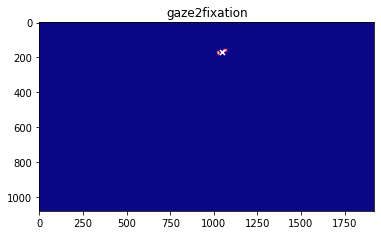

In [72]:
lines = lines.split('\n')

fx, fy = get_fixation_left(lines)
gaze_left_pos = get_gaze_pos_left(lines)

# Calculate mean of gaze samples associated to fixation
avg = gaze_left_pos.mean(axis=0)
std = gaze_left_pos.std(axis=0)

print(f'Fixation X,Y: {fx:.2f}, {fy:.2f}')
print(f'Mean Gaze X,Y: {avg[0]:.2f}, {avg[1]:.2f}')
print(f'Variance Gaze X,Y: {std[0]:.2f}, {std[1]:.2f}')

# Plot gaze samples associated to fixation

X = gaze_left_pos.astype(int)[:, 0]
Y = gaze_left_pos.astype(int)[:, 1]

canvas = np.zeros((1080, 1920))
canvas[Y, X] = 1

plt.imshow(canvas, cmap='plasma')
plt.scatter([fx], [fy], s=[25], c=['#ffffff'], marker='x')
plt.title('gaze2fixation')
plt.show()